In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd 
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from warnings import simplefilter
from sklearn.decomposition import PCA

In [3]:
rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [4]:
data_dir = Path('../input/')
trn_file = data_dir/'ecminer_standard_normal_outlier_train.csv'
test_file = data_dir/'standard_normal_test.xlsx'
submission_file = data_dir/'sample_submission.csv'
seed = 30


# 데이터 불러오기 (표준, 정규화된 train,test)

In [5]:
#submission
Submission_set = pd.read_csv(submission_file, index_col=0)

In [15]:
df_train = pd.read_csv(trn_file, index_col=0)
df_train.head()
df_train

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,0.71593,0.77264,0.40316,0.64074,0.64677,0.94167,0.94538,0.85393,0.87072,0.73753,0.75455,0.76380,0.77331,0.48721,0.48604,0.48816,0.48758,0.48684,0
1,0.58211,0.67078,0.24821,0.54204,0.56829,0.94167,0.85725,0.71459,0.77866,0.60163,0.64329,0.00000,0.00000,0.55662,0.55782,0.55504,0.55576,0.55742,1
2,0.61563,0.70340,0.31275,0.59320,0.61606,0.94167,0.87894,0.75838,0.81684,0.67186,0.71101,0.18317,0.18545,0.16847,0.17699,0.15917,0.16370,0.17312,0
3,0.74607,0.78397,0.43085,0.68153,0.69279,0.94167,0.96323,0.86695,0.88562,0.79043,0.81634,0.36634,0.29393,0.50552,0.50373,0.50711,0.50621,0.50483,0
4,0.73126,0.77752,0.40393,0.65321,0.66539,0.94167,0.95076,0.85709,0.86947,0.75189,0.77836,0.67781,0.66483,0.49220,0.49026,0.49393,0.49296,0.49144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,0.64326,0.72705,0.34709,0.61679,0.63554,0.94172,0.89694,0.78979,0.83669,0.70347,0.73837,0.18317,0.18545,0.34596,0.33817,0.35350,0.34959,0.34234,2
319996,0.64857,0.73377,0.35808,0.62365,0.64114,0.94176,0.90123,0.80006,0.84371,0.71355,0.74664,0.18317,0.18545,0.25817,0.25718,0.25885,0.25836,0.25798,1
319997,0.68721,0.74536,0.36082,0.62537,0.64203,0.94167,0.92631,0.81662,0.84567,0.71623,0.74752,0.90746,0.90998,0.49138,0.49009,0.49245,0.49181,0.49095,0
319998,0.65122,0.72829,0.33987,0.61037,0.62726,0.94167,0.87621,0.75147,0.81233,0.66799,0.70765,0.00000,0.00000,0.46582,0.46401,0.46742,0.46651,0.46513,0


In [7]:
df_test = pd.read_excel(test_file, index_col=0)
df_test

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
0,0.645901,0.497163,0.366653,0.639708,0.231155,0.791275,0.829775,0.806326,0.656040,0.809546,0.738651,0.000000,0.000000,0.441943,0.432759,0.452263,0.447330,0.436284
1,0.638994,0.482545,0.324590,0.602340,0.221802,0.790381,0.741489,0.720261,0.538013,0.753924,0.662954,0.183169,0.185449,0.090100,0.090372,0.091830,0.091313,0.088494
2,0.648525,0.494848,0.357325,0.629857,0.228940,0.791192,0.830264,0.802530,0.646055,0.802887,0.728117,0.000000,0.000000,0.665719,0.667375,0.664607,0.665319,0.665935
3,0.627269,0.482306,0.345314,0.629930,0.230165,0.790382,0.807824,0.787536,0.635359,0.803296,0.734282,0.000000,0.000000,0.420159,0.417853,0.423611,0.422125,0.417912
4,0.622829,0.475280,0.318437,0.598409,0.221244,0.790886,0.803284,0.778761,0.609777,0.783752,0.698084,0.183169,0.185449,0.374106,0.366823,0.382669,0.378640,0.369272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.654792,0.507836,0.395412,0.671076,0.239452,0.790379,0.834761,0.815273,0.678298,0.826788,0.769926,0.748698,0.758016,0.479917,0.477391,0.483480,0.481915,0.477673
79996,0.684023,0.539731,0.473001,0.751973,0.257750,0.790864,0.871572,0.857512,0.754129,0.877017,0.843614,0.549508,0.370898,0.585098,0.585922,0.584996,0.585234,0.584743
79997,0.650224,0.500913,0.391511,0.673348,0.240432,0.790375,0.826655,0.804674,0.672234,0.827124,0.772003,0.000000,0.000000,0.483121,0.480080,0.487208,0.485377,0.480623
79998,0.641740,0.490063,0.353976,0.630274,0.228628,0.790697,0.823882,0.796510,0.642847,0.803215,0.727791,0.748698,0.758016,0.473238,0.471325,0.476179,0.474929,0.471289


# train, test 결합(결측값 class =0으로 채움)

In [9]:
df = pd.concat([df_train, df_test])
df = df.fillna(value=0)

In [10]:
df['class']

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
79995    0.0
79996    0.0
79997    0.0
79998    0.0
79999    0.0
Name: class, Length: 399949, dtype: float64

## xy 분리

In [11]:
x = df.drop(['class'], axis=1)
y = df['class'].values
print(x)
print(y)

              u         g         r         i         z  redshift   dered_u  \
0      0.715930  0.772640  0.403160  0.640740  0.646770  0.941670  0.945380   
1      0.582110  0.670780  0.248210  0.542040  0.568290  0.941670  0.857250   
2      0.615630  0.703400  0.312750  0.593200  0.616060  0.941670  0.878940   
3      0.746070  0.783970  0.430850  0.681530  0.692790  0.941670  0.963230   
4      0.731260  0.777520  0.403930  0.653210  0.665390  0.941670  0.950760   
...         ...       ...       ...       ...       ...       ...       ...   
79995  0.654792  0.507836  0.395412  0.671076  0.239452  0.790379  0.834761   
79996  0.684023  0.539731  0.473001  0.751973  0.257750  0.790864  0.871572   
79997  0.650224  0.500913  0.391511  0.673348  0.240432  0.790375  0.826655   
79998  0.641740  0.490063  0.353976  0.630274  0.228628  0.790697  0.823882   
79999  0.672262  0.535259  0.470730  0.745886  0.258507  0.790383  0.855984   

        dered_g   dered_r   dered_i   dered_z  nObs

In [12]:
pd.isna(df)

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# PCA

In [13]:
pca = PCA(n_components=5)# 주성분 개수 설정 
p_comp = pca.fit_transform(x)


In [14]:
prin_df = pd.DataFrame(data=p_comp, columns=['p1','p2','p3','p4','p5'])
prin_df['class'] = y

In [15]:
prin_df

,p1,p2,p3,p4,p5,class
0,0.656046,-0.221382,-0.118996,-0.028400,-0.051223,0.0
1,-0.244655,0.432905,0.007327,0.258679,-0.020609,1.0
2,-0.418622,-0.456482,-0.062566,0.121004,0.011124,0.0
3,0.134894,0.107477,-0.177311,-0.144505,-0.010947,0.0
4,0.541840,-0.146652,-0.138178,-0.058958,-0.037895,0.0
...,...,...,...,...,...,...
399944,0.615627,-0.225516,0.442151,-0.037134,0.026986,0.0
399945,0.370154,0.176540,0.375155,-0.215235,0.051191,0.0
399946,-0.318679,0.285152,0.425250,-0.073458,0.035768,0.0
399947,0.604482,-0.237968,0.472680,0.041934,0.011798,0.0


## train, test 다시 분리

In [16]:

train = prin_df[:319949]
print(train)
test = prin_df[319949:]
print(test)
 

              p1        p2        p3        p4        p5  class
0       0.656046 -0.221382 -0.118996 -0.028400 -0.051223    0.0
1      -0.244655  0.432905  0.007327  0.258679 -0.020609    1.0
2      -0.418622 -0.456482 -0.062566  0.121004  0.011124    0.0
3       0.134894  0.107477 -0.177311 -0.144505 -0.010947    0.0
4       0.541840 -0.146652 -0.138178 -0.058958 -0.037895    0.0
...          ...       ...       ...       ...       ...    ...
319944 -0.226582 -0.107132 -0.091721  0.050673  0.007048    2.0
319945 -0.318287 -0.280374 -0.104291  0.026019  0.007967    1.0
319946  0.831135 -0.306249 -0.087023  0.049088 -0.022976    0.0
319947 -0.331640  0.252549 -0.079009  0.094793 -0.009161    0.0
319948 -0.529223 -0.131728 -0.147211 -0.065548  0.028118    0.0

[319949 rows x 6 columns]
              p1        p2        p3        p4        p5  class
319949 -0.364423  0.204579  0.437702 -0.028558  0.008319    0.0
319950 -0.515566 -0.610426  0.501369  0.130191  0.016287    0.0
319951 -0.128

In [10]:
import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMClassifier, plot_importance


In [18]:
# 모델 평가를 위해 훈련데이터 split하기
seed = 0
size = 0.1 # test 10%
X = train.drop('class', axis =1)
Y = train['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=seed)

In [19]:
X_train

,p1,p2,p3,p4,p5
38586,-0.281613,0.356214,-0.024048,0.186033,-0.035945
72704,-0.242069,0.412732,-0.096867,0.031043,0.004270
20759,-0.593260,-0.239478,-0.101444,0.036594,0.021561
211462,0.875233,0.156096,-0.068935,0.086599,0.019266
171234,-0.171269,0.000614,-0.067167,0.096380,-0.023120
...,...,...,...,...,...
122579,-0.342087,0.249609,0.001273,0.240882,-0.059101
304137,-0.296692,-0.247552,-0.135775,-0.039628,0.026923
152315,-0.368746,0.173652,-0.113721,-0.000571,-0.001179
117952,-0.383391,-0.398802,-0.095406,0.049982,0.021376


In [20]:
Y_train

38586     2.0
72704     1.0
20759     0.0
211462    0.0
171234    2.0
         ... 
122579    2.0
304137    0.0
152315    1.0
117952    0.0
305711    0.0
Name: class, Length: 287954, dtype: float64

# Modeling XGBOOST cpu

In [27]:
xgb_model = xgb.XGBClassifier(max_depth = 27, learning_rate = 0.01, n_estimators = 1050)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=27,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1050, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
xgb.XGBClassifier?

# Modeling LGBM cpu

In [21]:
LGBM_model = LGBMClassifier(max_depth=27, learning_rate = 0.01, n_estimators = 10000, boosting_type='dart')
LGBM_model.fit(X_train, Y_train, early_stopping_rounds= 100, eval_metric='logloss', eval_set=[(X_test,Y_test)])

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's multi_logloss: 0.976889
[2]	valid_0's multi_logloss: 0.969231
[3]	valid_0's multi_logloss: 0.961738
[4]	valid_0's multi_logloss: 0.954429
[5]	valid_0's multi_logloss: 0.947281
[6]	valid_0's multi_logloss: 0.940296
[7]	valid_0's multi_logloss: 0.93347
[8]	valid_0's multi_logloss: 0.935876
[9]	valid_0's multi_logloss: 0.92915
[10]	valid_0's multi_logloss: 0.922571
[11]	valid_0's multi_logloss: 0.916133
[12]	valid_0's multi_logloss: 0.918362
[13]	valid_0's multi_logloss: 0.91203
[14]	valid_0's multi_logloss: 0.90582
[15]	valid_0's multi_logloss: 0.899752
[16]	valid_0's multi_logloss: 0.893819
[17]	valid_0's multi_logloss: 0.888003
[18]	valid_0's multi_logloss: 0.882311
[19]	valid_0's multi_logloss: 0.876736
[20]	valid_0's multi_logloss: 0.871275
[21]	valid_0's multi_logloss: 0.872642
[22]	valid_0's multi_logloss: 0.867262
[23]	valid_0's multi_logloss: 0.862009
[24]	valid_0's

[207]	valid_0's multi_logloss: 0.725293
[208]	valid_0's multi_logloss: 0.722639
[209]	valid_0's multi_logloss: 0.724217
[210]	valid_0's multi_logloss: 0.72555
[211]	valid_0's multi_logloss: 0.726926
[212]	valid_0's multi_logloss: 0.724251
[213]	valid_0's multi_logloss: 0.7216
[214]	valid_0's multi_logloss: 0.719006
[215]	valid_0's multi_logloss: 0.716445
[216]	valid_0's multi_logloss: 0.717947
[217]	valid_0's multi_logloss: 0.715402
[218]	valid_0's multi_logloss: 0.712901
[219]	valid_0's multi_logloss: 0.715323
[220]	valid_0's multi_logloss: 0.712814
[221]	valid_0's multi_logloss: 0.714246
[222]	valid_0's multi_logloss: 0.711747
[223]	valid_0's multi_logloss: 0.709304
[224]	valid_0's multi_logloss: 0.71081
[225]	valid_0's multi_logloss: 0.712458
[226]	valid_0's multi_logloss: 0.71378
[227]	valid_0's multi_logloss: 0.714802
[228]	valid_0's multi_logloss: 0.712317
[229]	valid_0's multi_logloss: 0.713619
[230]	valid_0's multi_logloss: 0.711157
[231]	valid_0's multi_logloss: 0.70871
[232]	

[413]	valid_0's multi_logloss: 0.62208
[414]	valid_0's multi_logloss: 0.621049
[415]	valid_0's multi_logloss: 0.620031
[416]	valid_0's multi_logloss: 0.619034
[417]	valid_0's multi_logloss: 0.619794
[418]	valid_0's multi_logloss: 0.62054
[419]	valid_0's multi_logloss: 0.61952
[420]	valid_0's multi_logloss: 0.620236
[421]	valid_0's multi_logloss: 0.619238
[422]	valid_0's multi_logloss: 0.618221
[423]	valid_0's multi_logloss: 0.617232
[424]	valid_0's multi_logloss: 0.616234
[425]	valid_0's multi_logloss: 0.616954
[426]	valid_0's multi_logloss: 0.615976
[427]	valid_0's multi_logloss: 0.615002
[428]	valid_0's multi_logloss: 0.615721
[429]	valid_0's multi_logloss: 0.614782
[430]	valid_0's multi_logloss: 0.615688
[431]	valid_0's multi_logloss: 0.614729
[432]	valid_0's multi_logloss: 0.6138
[433]	valid_0's multi_logloss: 0.61284
[434]	valid_0's multi_logloss: 0.613509
[435]	valid_0's multi_logloss: 0.614151
[436]	valid_0's multi_logloss: 0.613229
[437]	valid_0's multi_logloss: 0.612282
[438]	

[621]	valid_0's multi_logloss: 0.584918
[622]	valid_0's multi_logloss: 0.585414
[623]	valid_0's multi_logloss: 0.584878
[624]	valid_0's multi_logloss: 0.585223
[625]	valid_0's multi_logloss: 0.584676
[626]	valid_0's multi_logloss: 0.584138
[627]	valid_0's multi_logloss: 0.583618
[628]	valid_0's multi_logloss: 0.583102
[629]	valid_0's multi_logloss: 0.583449
[630]	valid_0's multi_logloss: 0.583803
[631]	valid_0's multi_logloss: 0.583292
[632]	valid_0's multi_logloss: 0.582779
[633]	valid_0's multi_logloss: 0.583114
[634]	valid_0's multi_logloss: 0.583461
[635]	valid_0's multi_logloss: 0.582944
[636]	valid_0's multi_logloss: 0.582446
[637]	valid_0's multi_logloss: 0.581951
[638]	valid_0's multi_logloss: 0.582297
[639]	valid_0's multi_logloss: 0.582659
[640]	valid_0's multi_logloss: 0.58216
[641]	valid_0's multi_logloss: 0.582496
[642]	valid_0's multi_logloss: 0.582784
[643]	valid_0's multi_logloss: 0.582284
[644]	valid_0's multi_logloss: 0.582622
[645]	valid_0's multi_logloss: 0.582122
[

[827]	valid_0's multi_logloss: 0.569123
[828]	valid_0's multi_logloss: 0.568771
[829]	valid_0's multi_logloss: 0.568438
[830]	valid_0's multi_logloss: 0.568111
[831]	valid_0's multi_logloss: 0.567791
[832]	valid_0's multi_logloss: 0.567482
[833]	valid_0's multi_logloss: 0.567166
[834]	valid_0's multi_logloss: 0.567349
[835]	valid_0's multi_logloss: 0.567521
[836]	valid_0's multi_logloss: 0.567194
[837]	valid_0's multi_logloss: 0.56688
[838]	valid_0's multi_logloss: 0.567114
[839]	valid_0's multi_logloss: 0.566796
[840]	valid_0's multi_logloss: 0.566477
[841]	valid_0's multi_logloss: 0.566176
[842]	valid_0's multi_logloss: 0.565874
[843]	valid_0's multi_logloss: 0.565576
[844]	valid_0's multi_logloss: 0.565765
[845]	valid_0's multi_logloss: 0.565962
[846]	valid_0's multi_logloss: 0.566146
[847]	valid_0's multi_logloss: 0.565839
[848]	valid_0's multi_logloss: 0.566036
[849]	valid_0's multi_logloss: 0.566207
[850]	valid_0's multi_logloss: 0.5659
[851]	valid_0's multi_logloss: 0.566093
[85

[1033]	valid_0's multi_logloss: 0.557219
[1034]	valid_0's multi_logloss: 0.557018
[1035]	valid_0's multi_logloss: 0.55682
[1036]	valid_0's multi_logloss: 0.55662
[1037]	valid_0's multi_logloss: 0.556427
[1038]	valid_0's multi_logloss: 0.556567
[1039]	valid_0's multi_logloss: 0.55668
[1040]	valid_0's multi_logloss: 0.556807
[1041]	valid_0's multi_logloss: 0.556602
[1042]	valid_0's multi_logloss: 0.556764
[1043]	valid_0's multi_logloss: 0.556564
[1044]	valid_0's multi_logloss: 0.556369
[1045]	valid_0's multi_logloss: 0.556157
[1046]	valid_0's multi_logloss: 0.556269
[1047]	valid_0's multi_logloss: 0.556408
[1048]	valid_0's multi_logloss: 0.556202
[1049]	valid_0's multi_logloss: 0.556327
[1050]	valid_0's multi_logloss: 0.556135
[1051]	valid_0's multi_logloss: 0.556231
[1052]	valid_0's multi_logloss: 0.556333
[1053]	valid_0's multi_logloss: 0.556134
[1054]	valid_0's multi_logloss: 0.55594
[1055]	valid_0's multi_logloss: 0.556071
[1056]	valid_0's multi_logloss: 0.555884
[1057]	valid_0's mul

[1234]	valid_0's multi_logloss: 0.551684
[1235]	valid_0's multi_logloss: 0.551797
[1236]	valid_0's multi_logloss: 0.551644
[1237]	valid_0's multi_logloss: 0.551491
[1238]	valid_0's multi_logloss: 0.551584
[1239]	valid_0's multi_logloss: 0.551666
[1240]	valid_0's multi_logloss: 0.551768
[1241]	valid_0's multi_logloss: 0.551876
[1242]	valid_0's multi_logloss: 0.551708
[1243]	valid_0's multi_logloss: 0.551787
[1244]	valid_0's multi_logloss: 0.551636
[1245]	valid_0's multi_logloss: 0.551475
[1246]	valid_0's multi_logloss: 0.551314
[1247]	valid_0's multi_logloss: 0.551398
[1248]	valid_0's multi_logloss: 0.551505
[1249]	valid_0's multi_logloss: 0.551601
[1250]	valid_0's multi_logloss: 0.551452
[1251]	valid_0's multi_logloss: 0.551289
[1252]	valid_0's multi_logloss: 0.551378
[1253]	valid_0's multi_logloss: 0.551453
[1254]	valid_0's multi_logloss: 0.551307
[1255]	valid_0's multi_logloss: 0.551156
[1256]	valid_0's multi_logloss: 0.551267
[1257]	valid_0's multi_logloss: 0.551116
[1258]	valid_0's

[1435]	valid_0's multi_logloss: 0.547121
[1436]	valid_0's multi_logloss: 0.547179
[1437]	valid_0's multi_logloss: 0.547059
[1438]	valid_0's multi_logloss: 0.547137
[1439]	valid_0's multi_logloss: 0.547022
[1440]	valid_0's multi_logloss: 0.547084
[1441]	valid_0's multi_logloss: 0.547139
[1442]	valid_0's multi_logloss: 0.547208
[1443]	valid_0's multi_logloss: 0.547085
[1444]	valid_0's multi_logloss: 0.547159
[1445]	valid_0's multi_logloss: 0.547043
[1446]	valid_0's multi_logloss: 0.546933
[1447]	valid_0's multi_logloss: 0.547004
[1448]	valid_0's multi_logloss: 0.547064
[1449]	valid_0's multi_logloss: 0.547143
[1450]	valid_0's multi_logloss: 0.547023
[1451]	valid_0's multi_logloss: 0.546907
[1452]	valid_0's multi_logloss: 0.546991
[1453]	valid_0's multi_logloss: 0.547052
[1454]	valid_0's multi_logloss: 0.546931
[1455]	valid_0's multi_logloss: 0.546816
[1456]	valid_0's multi_logloss: 0.546704
[1457]	valid_0's multi_logloss: 0.54659
[1458]	valid_0's multi_logloss: 0.546477
[1459]	valid_0's 

[1640]	valid_0's multi_logloss: 0.543396
[1641]	valid_0's multi_logloss: 0.543462
[1642]	valid_0's multi_logloss: 0.543506
[1643]	valid_0's multi_logloss: 0.543571
[1644]	valid_0's multi_logloss: 0.543615
[1645]	valid_0's multi_logloss: 0.543671
[1646]	valid_0's multi_logloss: 0.543726
[1647]	valid_0's multi_logloss: 0.543781
[1648]	valid_0's multi_logloss: 0.543688
[1649]	valid_0's multi_logloss: 0.543768
[1650]	valid_0's multi_logloss: 0.543821
[1651]	valid_0's multi_logloss: 0.543726
[1652]	valid_0's multi_logloss: 0.543783
[1653]	valid_0's multi_logloss: 0.543688
[1654]	valid_0's multi_logloss: 0.543596
[1655]	valid_0's multi_logloss: 0.543676
[1656]	valid_0's multi_logloss: 0.543584
[1657]	valid_0's multi_logloss: 0.543494
[1658]	valid_0's multi_logloss: 0.543406
[1659]	valid_0's multi_logloss: 0.543326
[1660]	valid_0's multi_logloss: 0.543377
[1661]	valid_0's multi_logloss: 0.543437
[1662]	valid_0's multi_logloss: 0.543342
[1663]	valid_0's multi_logloss: 0.543253
[1664]	valid_0's

[1842]	valid_0's multi_logloss: 0.539924
[1843]	valid_0's multi_logloss: 0.539967
[1844]	valid_0's multi_logloss: 0.540016
[1845]	valid_0's multi_logloss: 0.540057
[1846]	valid_0's multi_logloss: 0.539992
[1847]	valid_0's multi_logloss: 0.540034
[1848]	valid_0's multi_logloss: 0.539962
[1849]	valid_0's multi_logloss: 0.539888
[1850]	valid_0's multi_logloss: 0.539815
[1851]	valid_0's multi_logloss: 0.539848
[1852]	valid_0's multi_logloss: 0.539882
[1853]	valid_0's multi_logloss: 0.539921
[1854]	valid_0's multi_logloss: 0.53986
[1855]	valid_0's multi_logloss: 0.539906
[1856]	valid_0's multi_logloss: 0.539959
[1857]	valid_0's multi_logloss: 0.539894
[1858]	valid_0's multi_logloss: 0.539944
[1859]	valid_0's multi_logloss: 0.539875
[1860]	valid_0's multi_logloss: 0.539908
[1861]	valid_0's multi_logloss: 0.539844
[1862]	valid_0's multi_logloss: 0.539879
[1863]	valid_0's multi_logloss: 0.539802
[1864]	valid_0's multi_logloss: 0.539732
[1865]	valid_0's multi_logloss: 0.539665
[1866]	valid_0's 

[2044]	valid_0's multi_logloss: 0.537551
[2045]	valid_0's multi_logloss: 0.537492
[2046]	valid_0's multi_logloss: 0.537521
[2047]	valid_0's multi_logloss: 0.537462
[2048]	valid_0's multi_logloss: 0.537493
[2049]	valid_0's multi_logloss: 0.537524
[2050]	valid_0's multi_logloss: 0.537558
[2051]	valid_0's multi_logloss: 0.537504
[2052]	valid_0's multi_logloss: 0.537448
[2053]	valid_0's multi_logloss: 0.53739
[2054]	valid_0's multi_logloss: 0.537333
[2055]	valid_0's multi_logloss: 0.537282
[2056]	valid_0's multi_logloss: 0.537323
[2057]	valid_0's multi_logloss: 0.537348
[2058]	valid_0's multi_logloss: 0.53738
[2059]	valid_0's multi_logloss: 0.537326
[2060]	valid_0's multi_logloss: 0.537366
[2061]	valid_0's multi_logloss: 0.537392
[2062]	valid_0's multi_logloss: 0.537421
[2063]	valid_0's multi_logloss: 0.537453
[2064]	valid_0's multi_logloss: 0.537485
[2065]	valid_0's multi_logloss: 0.537517
[2066]	valid_0's multi_logloss: 0.537556
[2067]	valid_0's multi_logloss: 0.537504
[2068]	valid_0's m

[2247]	valid_0's multi_logloss: 0.535388
[2248]	valid_0's multi_logloss: 0.535415
[2249]	valid_0's multi_logloss: 0.535372
[2250]	valid_0's multi_logloss: 0.535322
[2251]	valid_0's multi_logloss: 0.535276
[2252]	valid_0's multi_logloss: 0.535224
[2253]	valid_0's multi_logloss: 0.535174
[2254]	valid_0's multi_logloss: 0.535122
[2255]	valid_0's multi_logloss: 0.53507
[2256]	valid_0's multi_logloss: 0.535021
[2257]	valid_0's multi_logloss: 0.534972
[2258]	valid_0's multi_logloss: 0.534925
[2259]	valid_0's multi_logloss: 0.534872
[2260]	valid_0's multi_logloss: 0.534893
[2261]	valid_0's multi_logloss: 0.534847
[2262]	valid_0's multi_logloss: 0.534803
[2263]	valid_0's multi_logloss: 0.534835
[2264]	valid_0's multi_logloss: 0.534787
[2265]	valid_0's multi_logloss: 0.534809
[2266]	valid_0's multi_logloss: 0.534835
[2267]	valid_0's multi_logloss: 0.534861
[2268]	valid_0's multi_logloss: 0.534887
[2269]	valid_0's multi_logloss: 0.534923
[2270]	valid_0's multi_logloss: 0.534881
[2271]	valid_0's 

[2448]	valid_0's multi_logloss: 0.533045
[2449]	valid_0's multi_logloss: 0.533009
[2450]	valid_0's multi_logloss: 0.533035
[2451]	valid_0's multi_logloss: 0.533001
[2452]	valid_0's multi_logloss: 0.532962
[2453]	valid_0's multi_logloss: 0.532985
[2454]	valid_0's multi_logloss: 0.532948
[2455]	valid_0's multi_logloss: 0.532907
[2456]	valid_0's multi_logloss: 0.532939
[2457]	valid_0's multi_logloss: 0.532964
[2458]	valid_0's multi_logloss: 0.532927
[2459]	valid_0's multi_logloss: 0.532894
[2460]	valid_0's multi_logloss: 0.532852
[2461]	valid_0's multi_logloss: 0.532816
[2462]	valid_0's multi_logloss: 0.532848
[2463]	valid_0's multi_logloss: 0.53287
[2464]	valid_0's multi_logloss: 0.532894
[2465]	valid_0's multi_logloss: 0.532854
[2466]	valid_0's multi_logloss: 0.532809
[2467]	valid_0's multi_logloss: 0.532774
[2468]	valid_0's multi_logloss: 0.532789
[2469]	valid_0's multi_logloss: 0.53281
[2470]	valid_0's multi_logloss: 0.532768
[2471]	valid_0's multi_logloss: 0.53273
[2472]	valid_0's mu

[2649]	valid_0's multi_logloss: 0.531697
[2650]	valid_0's multi_logloss: 0.531715
[2651]	valid_0's multi_logloss: 0.531734
[2652]	valid_0's multi_logloss: 0.531754
[2653]	valid_0's multi_logloss: 0.531718
[2654]	valid_0's multi_logloss: 0.531682
[2655]	valid_0's multi_logloss: 0.531703
[2656]	valid_0's multi_logloss: 0.531668
[2657]	valid_0's multi_logloss: 0.53169
[2658]	valid_0's multi_logloss: 0.531651
[2659]	valid_0's multi_logloss: 0.531612
[2660]	valid_0's multi_logloss: 0.531577
[2661]	valid_0's multi_logloss: 0.531597
[2662]	valid_0's multi_logloss: 0.531617
[2663]	valid_0's multi_logloss: 0.531582
[2664]	valid_0's multi_logloss: 0.531545
[2665]	valid_0's multi_logloss: 0.531568
[2666]	valid_0's multi_logloss: 0.531603
[2667]	valid_0's multi_logloss: 0.531624
[2668]	valid_0's multi_logloss: 0.531647
[2669]	valid_0's multi_logloss: 0.531681
[2670]	valid_0's multi_logloss: 0.531697
[2671]	valid_0's multi_logloss: 0.531724
[2672]	valid_0's multi_logloss: 0.53169
[2673]	valid_0's m

[2853]	valid_0's multi_logloss: 0.530962
[2854]	valid_0's multi_logloss: 0.530925
[2855]	valid_0's multi_logloss: 0.530886
[2856]	valid_0's multi_logloss: 0.530901
[2857]	valid_0's multi_logloss: 0.530926
[2858]	valid_0's multi_logloss: 0.530888
[2859]	valid_0's multi_logloss: 0.530913
[2860]	valid_0's multi_logloss: 0.530938
[2861]	valid_0's multi_logloss: 0.530965
[2862]	valid_0's multi_logloss: 0.530931
[2863]	valid_0's multi_logloss: 0.530893
[2864]	valid_0's multi_logloss: 0.530853
[2865]	valid_0's multi_logloss: 0.530814
[2866]	valid_0's multi_logloss: 0.530776
[2867]	valid_0's multi_logloss: 0.530737
[2868]	valid_0's multi_logloss: 0.530754
[2869]	valid_0's multi_logloss: 0.530771
[2870]	valid_0's multi_logloss: 0.530786
[2871]	valid_0's multi_logloss: 0.530747
[2872]	valid_0's multi_logloss: 0.530711
[2873]	valid_0's multi_logloss: 0.530673
[2874]	valid_0's multi_logloss: 0.530639
[2875]	valid_0's multi_logloss: 0.530667
[2876]	valid_0's multi_logloss: 0.530682
[2877]	valid_0's

[3057]	valid_0's multi_logloss: 0.528997
[3058]	valid_0's multi_logloss: 0.529011
[3059]	valid_0's multi_logloss: 0.52903
[3060]	valid_0's multi_logloss: 0.529047
[3061]	valid_0's multi_logloss: 0.529015
[3062]	valid_0's multi_logloss: 0.529028
[3063]	valid_0's multi_logloss: 0.528999
[3064]	valid_0's multi_logloss: 0.528975
[3065]	valid_0's multi_logloss: 0.528998
[3066]	valid_0's multi_logloss: 0.529013
[3067]	valid_0's multi_logloss: 0.52903
[3068]	valid_0's multi_logloss: 0.528988
[3069]	valid_0's multi_logloss: 0.529004
[3070]	valid_0's multi_logloss: 0.528974
[3071]	valid_0's multi_logloss: 0.528992
[3072]	valid_0's multi_logloss: 0.529006
[3073]	valid_0's multi_logloss: 0.529024
[3074]	valid_0's multi_logloss: 0.528998
[3075]	valid_0's multi_logloss: 0.529015
[3076]	valid_0's multi_logloss: 0.528989
[3077]	valid_0's multi_logloss: 0.52901
[3078]	valid_0's multi_logloss: 0.529031
[3079]	valid_0's multi_logloss: 0.529006
[3080]	valid_0's multi_logloss: 0.529023
[3081]	valid_0's mu

[3260]	valid_0's multi_logloss: 0.527842
[3261]	valid_0's multi_logloss: 0.527857
[3262]	valid_0's multi_logloss: 0.527827
[3263]	valid_0's multi_logloss: 0.527798
[3264]	valid_0's multi_logloss: 0.527813
[3265]	valid_0's multi_logloss: 0.527783
[3266]	valid_0's multi_logloss: 0.527797
[3267]	valid_0's multi_logloss: 0.527813
[3268]	valid_0's multi_logloss: 0.527825
[3269]	valid_0's multi_logloss: 0.527842
[3270]	valid_0's multi_logloss: 0.527858
[3271]	valid_0's multi_logloss: 0.527828
[3272]	valid_0's multi_logloss: 0.5278
[3273]	valid_0's multi_logloss: 0.527778
[3274]	valid_0's multi_logloss: 0.527793
[3275]	valid_0's multi_logloss: 0.527769
[3276]	valid_0's multi_logloss: 0.527737
[3277]	valid_0's multi_logloss: 0.527711
[3278]	valid_0's multi_logloss: 0.527723
[3279]	valid_0's multi_logloss: 0.527736
[3280]	valid_0's multi_logloss: 0.527711
[3281]	valid_0's multi_logloss: 0.527681
[3282]	valid_0's multi_logloss: 0.527649
[3283]	valid_0's multi_logloss: 0.527664
[3284]	valid_0's m

[3461]	valid_0's multi_logloss: 0.526448
[3462]	valid_0's multi_logloss: 0.526429
[3463]	valid_0's multi_logloss: 0.526408
[3464]	valid_0's multi_logloss: 0.526381
[3465]	valid_0's multi_logloss: 0.526397
[3466]	valid_0's multi_logloss: 0.52637
[3467]	valid_0's multi_logloss: 0.526341
[3468]	valid_0's multi_logloss: 0.526354
[3469]	valid_0's multi_logloss: 0.526367
[3470]	valid_0's multi_logloss: 0.526381
[3471]	valid_0's multi_logloss: 0.526355
[3472]	valid_0's multi_logloss: 0.526332
[3473]	valid_0's multi_logloss: 0.526347
[3474]	valid_0's multi_logloss: 0.526328
[3475]	valid_0's multi_logloss: 0.526305
[3476]	valid_0's multi_logloss: 0.526325
[3477]	valid_0's multi_logloss: 0.526297
[3478]	valid_0's multi_logloss: 0.526275
[3479]	valid_0's multi_logloss: 0.526289
[3480]	valid_0's multi_logloss: 0.526297
[3481]	valid_0's multi_logloss: 0.526308
[3482]	valid_0's multi_logloss: 0.526285
[3483]	valid_0's multi_logloss: 0.526295
[3484]	valid_0's multi_logloss: 0.52627
[3485]	valid_0's m

[3663]	valid_0's multi_logloss: 0.525296
[3664]	valid_0's multi_logloss: 0.52527
[3665]	valid_0's multi_logloss: 0.525284
[3666]	valid_0's multi_logloss: 0.525296
[3667]	valid_0's multi_logloss: 0.525277
[3668]	valid_0's multi_logloss: 0.525253
[3669]	valid_0's multi_logloss: 0.525262
[3670]	valid_0's multi_logloss: 0.525245
[3671]	valid_0's multi_logloss: 0.525217
[3672]	valid_0's multi_logloss: 0.525229
[3673]	valid_0's multi_logloss: 0.525241
[3674]	valid_0's multi_logloss: 0.525217
[3675]	valid_0's multi_logloss: 0.52523
[3676]	valid_0's multi_logloss: 0.525246
[3677]	valid_0's multi_logloss: 0.525221
[3678]	valid_0's multi_logloss: 0.525241
[3679]	valid_0's multi_logloss: 0.525222
[3680]	valid_0's multi_logloss: 0.5252
[3681]	valid_0's multi_logloss: 0.525177
[3682]	valid_0's multi_logloss: 0.525157
[3683]	valid_0's multi_logloss: 0.525132
[3684]	valid_0's multi_logloss: 0.525146
[3685]	valid_0's multi_logloss: 0.525123
[3686]	valid_0's multi_logloss: 0.525104
[3687]	valid_0's mul

[3865]	valid_0's multi_logloss: 0.524006
[3866]	valid_0's multi_logloss: 0.524017
[3867]	valid_0's multi_logloss: 0.524035
[3868]	valid_0's multi_logloss: 0.524017
[3869]	valid_0's multi_logloss: 0.52403
[3870]	valid_0's multi_logloss: 0.524006
[3871]	valid_0's multi_logloss: 0.524017
[3872]	valid_0's multi_logloss: 0.523999
[3873]	valid_0's multi_logloss: 0.524014
[3874]	valid_0's multi_logloss: 0.523996
[3875]	valid_0's multi_logloss: 0.52401
[3876]	valid_0's multi_logloss: 0.523989
[3877]	valid_0's multi_logloss: 0.523969
[3878]	valid_0's multi_logloss: 0.523945
[3879]	valid_0's multi_logloss: 0.523925
[3880]	valid_0's multi_logloss: 0.523934
[3881]	valid_0's multi_logloss: 0.523944
[3882]	valid_0's multi_logloss: 0.523919
[3883]	valid_0's multi_logloss: 0.523899
[3884]	valid_0's multi_logloss: 0.523913
[3885]	valid_0's multi_logloss: 0.523891
[3886]	valid_0's multi_logloss: 0.523873
[3887]	valid_0's multi_logloss: 0.523853
[3888]	valid_0's multi_logloss: 0.523866
[3889]	valid_0's m

[4066]	valid_0's multi_logloss: 0.52319
[4067]	valid_0's multi_logloss: 0.523203
[4068]	valid_0's multi_logloss: 0.523218
[4069]	valid_0's multi_logloss: 0.523233
[4070]	valid_0's multi_logloss: 0.523215
[4071]	valid_0's multi_logloss: 0.523198
[4072]	valid_0's multi_logloss: 0.523181
[4073]	valid_0's multi_logloss: 0.52316
[4074]	valid_0's multi_logloss: 0.523139
[4075]	valid_0's multi_logloss: 0.523149
[4076]	valid_0's multi_logloss: 0.523128
[4077]	valid_0's multi_logloss: 0.523106
[4078]	valid_0's multi_logloss: 0.523085
[4079]	valid_0's multi_logloss: 0.523063
[4080]	valid_0's multi_logloss: 0.523073
[4081]	valid_0's multi_logloss: 0.523054
[4082]	valid_0's multi_logloss: 0.523067
[4083]	valid_0's multi_logloss: 0.523079
[4084]	valid_0's multi_logloss: 0.523063
[4085]	valid_0's multi_logloss: 0.523074
[4086]	valid_0's multi_logloss: 0.523087
[4087]	valid_0's multi_logloss: 0.523096
[4088]	valid_0's multi_logloss: 0.523103
[4089]	valid_0's multi_logloss: 0.523081
[4090]	valid_0's m

[4267]	valid_0's multi_logloss: 0.522413
[4268]	valid_0's multi_logloss: 0.522424
[4269]	valid_0's multi_logloss: 0.522434
[4270]	valid_0's multi_logloss: 0.522412
[4271]	valid_0's multi_logloss: 0.522418
[4272]	valid_0's multi_logloss: 0.522429
[4273]	valid_0's multi_logloss: 0.522439
[4274]	valid_0's multi_logloss: 0.522447
[4275]	valid_0's multi_logloss: 0.522461
[4276]	valid_0's multi_logloss: 0.522445
[4277]	valid_0's multi_logloss: 0.522457
[4278]	valid_0's multi_logloss: 0.522464
[4279]	valid_0's multi_logloss: 0.522449
[4280]	valid_0's multi_logloss: 0.522434
[4281]	valid_0's multi_logloss: 0.522449
[4282]	valid_0's multi_logloss: 0.522435
[4283]	valid_0's multi_logloss: 0.522414
[4284]	valid_0's multi_logloss: 0.522394
[4285]	valid_0's multi_logloss: 0.52238
[4286]	valid_0's multi_logloss: 0.522361
[4287]	valid_0's multi_logloss: 0.522372
[4288]	valid_0's multi_logloss: 0.522384
[4289]	valid_0's multi_logloss: 0.522397
[4290]	valid_0's multi_logloss: 0.522406
[4291]	valid_0's 

[4470]	valid_0's multi_logloss: 0.521819
[4471]	valid_0's multi_logloss: 0.521827
[4472]	valid_0's multi_logloss: 0.52181
[4473]	valid_0's multi_logloss: 0.521822
[4474]	valid_0's multi_logloss: 0.521798
[4475]	valid_0's multi_logloss: 0.521808
[4476]	valid_0's multi_logloss: 0.52182
[4477]	valid_0's multi_logloss: 0.521796
[4478]	valid_0's multi_logloss: 0.521777
[4479]	valid_0's multi_logloss: 0.521788
[4480]	valid_0's multi_logloss: 0.521769
[4481]	valid_0's multi_logloss: 0.521749
[4482]	valid_0's multi_logloss: 0.521761
[4483]	valid_0's multi_logloss: 0.521774
[4484]	valid_0's multi_logloss: 0.521782
[4485]	valid_0's multi_logloss: 0.521792
[4486]	valid_0's multi_logloss: 0.521773
[4487]	valid_0's multi_logloss: 0.52175
[4488]	valid_0's multi_logloss: 0.521758
[4489]	valid_0's multi_logloss: 0.521768
[4490]	valid_0's multi_logloss: 0.521778
[4491]	valid_0's multi_logloss: 0.521763
[4492]	valid_0's multi_logloss: 0.52177
[4493]	valid_0's multi_logloss: 0.521778
[4494]	valid_0's mul

[4671]	valid_0's multi_logloss: 0.521348
[4672]	valid_0's multi_logloss: 0.521333
[4673]	valid_0's multi_logloss: 0.521346
[4674]	valid_0's multi_logloss: 0.521352
[4675]	valid_0's multi_logloss: 0.521331
[4676]	valid_0's multi_logloss: 0.521339
[4677]	valid_0's multi_logloss: 0.521325
[4678]	valid_0's multi_logloss: 0.521308
[4679]	valid_0's multi_logloss: 0.52132
[4680]	valid_0's multi_logloss: 0.521325
[4681]	valid_0's multi_logloss: 0.521335
[4682]	valid_0's multi_logloss: 0.521318
[4683]	valid_0's multi_logloss: 0.521298
[4684]	valid_0's multi_logloss: 0.521284
[4685]	valid_0's multi_logloss: 0.521265
[4686]	valid_0's multi_logloss: 0.521273
[4687]	valid_0's multi_logloss: 0.521257
[4688]	valid_0's multi_logloss: 0.521234
[4689]	valid_0's multi_logloss: 0.521217
[4690]	valid_0's multi_logloss: 0.521205
[4691]	valid_0's multi_logloss: 0.521213
[4692]	valid_0's multi_logloss: 0.521221
[4693]	valid_0's multi_logloss: 0.521229
[4694]	valid_0's multi_logloss: 0.521236
[4695]	valid_0's 

[4872]	valid_0's multi_logloss: 0.520551
[4873]	valid_0's multi_logloss: 0.52053
[4874]	valid_0's multi_logloss: 0.520515
[4875]	valid_0's multi_logloss: 0.520496
[4876]	valid_0's multi_logloss: 0.520502
[4877]	valid_0's multi_logloss: 0.520511
[4878]	valid_0's multi_logloss: 0.520494
[4879]	valid_0's multi_logloss: 0.520478
[4880]	valid_0's multi_logloss: 0.520457
[4881]	valid_0's multi_logloss: 0.520468
[4882]	valid_0's multi_logloss: 0.520474
[4883]	valid_0's multi_logloss: 0.520453
[4884]	valid_0's multi_logloss: 0.520461
[4885]	valid_0's multi_logloss: 0.520443
[4886]	valid_0's multi_logloss: 0.520453
[4887]	valid_0's multi_logloss: 0.520438
[4888]	valid_0's multi_logloss: 0.520421
[4889]	valid_0's multi_logloss: 0.520401
[4890]	valid_0's multi_logloss: 0.520386
[4891]	valid_0's multi_logloss: 0.520374
[4892]	valid_0's multi_logloss: 0.520384
[4893]	valid_0's multi_logloss: 0.520394
[4894]	valid_0's multi_logloss: 0.520404
[4895]	valid_0's multi_logloss: 0.520391
[4896]	valid_0's 

[5074]	valid_0's multi_logloss: 0.519571
[5075]	valid_0's multi_logloss: 0.519555
[5076]	valid_0's multi_logloss: 0.519536
[5077]	valid_0's multi_logloss: 0.519523
[5078]	valid_0's multi_logloss: 0.519505
[5079]	valid_0's multi_logloss: 0.519517
[5080]	valid_0's multi_logloss: 0.519522
[5081]	valid_0's multi_logloss: 0.519501
[5082]	valid_0's multi_logloss: 0.519507
[5083]	valid_0's multi_logloss: 0.519491
[5084]	valid_0's multi_logloss: 0.519497
[5085]	valid_0's multi_logloss: 0.519507
[5086]	valid_0's multi_logloss: 0.519513
[5087]	valid_0's multi_logloss: 0.519522
[5088]	valid_0's multi_logloss: 0.519506
[5089]	valid_0's multi_logloss: 0.519488
[5090]	valid_0's multi_logloss: 0.519496
[5091]	valid_0's multi_logloss: 0.51948
[5092]	valid_0's multi_logloss: 0.519464
[5093]	valid_0's multi_logloss: 0.519447
[5094]	valid_0's multi_logloss: 0.519454
[5095]	valid_0's multi_logloss: 0.519462
[5096]	valid_0's multi_logloss: 0.519471
[5097]	valid_0's multi_logloss: 0.519478
[5098]	valid_0's 

[5278]	valid_0's multi_logloss: 0.518821
[5279]	valid_0's multi_logloss: 0.518811
[5280]	valid_0's multi_logloss: 0.518817
[5281]	valid_0's multi_logloss: 0.518801
[5282]	valid_0's multi_logloss: 0.518813
[5283]	valid_0's multi_logloss: 0.518796
[5284]	valid_0's multi_logloss: 0.518782
[5285]	valid_0's multi_logloss: 0.518766
[5286]	valid_0's multi_logloss: 0.518775
[5287]	valid_0's multi_logloss: 0.518784
[5288]	valid_0's multi_logloss: 0.518764
[5289]	valid_0's multi_logloss: 0.518746
[5290]	valid_0's multi_logloss: 0.518752
[5291]	valid_0's multi_logloss: 0.51874
[5292]	valid_0's multi_logloss: 0.518725
[5293]	valid_0's multi_logloss: 0.518732
[5294]	valid_0's multi_logloss: 0.518739
[5295]	valid_0's multi_logloss: 0.518726
[5296]	valid_0's multi_logloss: 0.51871
[5297]	valid_0's multi_logloss: 0.5187
[5298]	valid_0's multi_logloss: 0.518705
[5299]	valid_0's multi_logloss: 0.518691
[5300]	valid_0's multi_logloss: 0.518679
[5301]	valid_0's multi_logloss: 0.51869
[5302]	valid_0's mult

[5480]	valid_0's multi_logloss: 0.51795
[5481]	valid_0's multi_logloss: 0.517935
[5482]	valid_0's multi_logloss: 0.517923
[5483]	valid_0's multi_logloss: 0.517909
[5484]	valid_0's multi_logloss: 0.517899
[5485]	valid_0's multi_logloss: 0.517906
[5486]	valid_0's multi_logloss: 0.517893
[5487]	valid_0's multi_logloss: 0.51788
[5488]	valid_0's multi_logloss: 0.51789
[5489]	valid_0's multi_logloss: 0.517876
[5490]	valid_0's multi_logloss: 0.517884
[5491]	valid_0's multi_logloss: 0.517871
[5492]	valid_0's multi_logloss: 0.517861
[5493]	valid_0's multi_logloss: 0.517867
[5494]	valid_0's multi_logloss: 0.517873
[5495]	valid_0's multi_logloss: 0.517881
[5496]	valid_0's multi_logloss: 0.517888
[5497]	valid_0's multi_logloss: 0.517876
[5498]	valid_0's multi_logloss: 0.517884
[5499]	valid_0's multi_logloss: 0.517873
[5500]	valid_0's multi_logloss: 0.517877
[5501]	valid_0's multi_logloss: 0.517863
[5502]	valid_0's multi_logloss: 0.517873
[5503]	valid_0's multi_logloss: 0.517857
[5504]	valid_0's mu

[5682]	valid_0's multi_logloss: 0.517235
[5683]	valid_0's multi_logloss: 0.517241
[5684]	valid_0's multi_logloss: 0.517231
[5685]	valid_0's multi_logloss: 0.517238
[5686]	valid_0's multi_logloss: 0.517245
[5687]	valid_0's multi_logloss: 0.517256
[5688]	valid_0's multi_logloss: 0.517263
[5689]	valid_0's multi_logloss: 0.517251
[5690]	valid_0's multi_logloss: 0.517239
[5691]	valid_0's multi_logloss: 0.517231
[5692]	valid_0's multi_logloss: 0.517235
[5693]	valid_0's multi_logloss: 0.51724
[5694]	valid_0's multi_logloss: 0.517246
[5695]	valid_0's multi_logloss: 0.517232
[5696]	valid_0's multi_logloss: 0.51724
[5697]	valid_0's multi_logloss: 0.517228
[5698]	valid_0's multi_logloss: 0.517215
[5699]	valid_0's multi_logloss: 0.517223
[5700]	valid_0's multi_logloss: 0.51721
[5701]	valid_0's multi_logloss: 0.517214
[5702]	valid_0's multi_logloss: 0.517221
[5703]	valid_0's multi_logloss: 0.517227
[5704]	valid_0's multi_logloss: 0.517233
[5705]	valid_0's multi_logloss: 0.517239
[5706]	valid_0's mu

[5887]	valid_0's multi_logloss: 0.51687
[5888]	valid_0's multi_logloss: 0.51686
[5889]	valid_0's multi_logloss: 0.516847
[5890]	valid_0's multi_logloss: 0.516855
[5891]	valid_0's multi_logloss: 0.516847
[5892]	valid_0's multi_logloss: 0.51684
[5893]	valid_0's multi_logloss: 0.516848
[5894]	valid_0's multi_logloss: 0.516837
[5895]	valid_0's multi_logloss: 0.516842
[5896]	valid_0's multi_logloss: 0.516847
[5897]	valid_0's multi_logloss: 0.516834
[5898]	valid_0's multi_logloss: 0.51682
[5899]	valid_0's multi_logloss: 0.516808
[5900]	valid_0's multi_logloss: 0.516814
[5901]	valid_0's multi_logloss: 0.516821
[5902]	valid_0's multi_logloss: 0.516825
[5903]	valid_0's multi_logloss: 0.51683
[5904]	valid_0's multi_logloss: 0.516817
[5905]	valid_0's multi_logloss: 0.516823
[5906]	valid_0's multi_logloss: 0.516828
[5907]	valid_0's multi_logloss: 0.516813
[5908]	valid_0's multi_logloss: 0.516819
[5909]	valid_0's multi_logloss: 0.516823
[5910]	valid_0's multi_logloss: 0.516812
[5911]	valid_0's mult

[6094]	valid_0's multi_logloss: 0.516228
[6095]	valid_0's multi_logloss: 0.516235
[6096]	valid_0's multi_logloss: 0.516239
[6097]	valid_0's multi_logloss: 0.516223
[6098]	valid_0's multi_logloss: 0.516228
[6099]	valid_0's multi_logloss: 0.516219
[6100]	valid_0's multi_logloss: 0.516227
[6101]	valid_0's multi_logloss: 0.516218
[6102]	valid_0's multi_logloss: 0.516207
[6103]	valid_0's multi_logloss: 0.516215
[6104]	valid_0's multi_logloss: 0.516205
[6105]	valid_0's multi_logloss: 0.516209
[6106]	valid_0's multi_logloss: 0.516215
[6107]	valid_0's multi_logloss: 0.516221
[6108]	valid_0's multi_logloss: 0.516228
[6109]	valid_0's multi_logloss: 0.516216
[6110]	valid_0's multi_logloss: 0.51622
[6111]	valid_0's multi_logloss: 0.516226
[6112]	valid_0's multi_logloss: 0.516214
[6113]	valid_0's multi_logloss: 0.51622
[6114]	valid_0's multi_logloss: 0.516225
[6115]	valid_0's multi_logloss: 0.516233
[6116]	valid_0's multi_logloss: 0.516238
[6117]	valid_0's multi_logloss: 0.516242
[6118]	valid_0's m

[6296]	valid_0's multi_logloss: 0.515736
[6297]	valid_0's multi_logloss: 0.515742
[6298]	valid_0's multi_logloss: 0.515746
[6299]	valid_0's multi_logloss: 0.515731
[6300]	valid_0's multi_logloss: 0.51572
[6301]	valid_0's multi_logloss: 0.515725
[6302]	valid_0's multi_logloss: 0.515731
[6303]	valid_0's multi_logloss: 0.515738
[6304]	valid_0's multi_logloss: 0.515743
[6305]	valid_0's multi_logloss: 0.51573
[6306]	valid_0's multi_logloss: 0.515735
[6307]	valid_0's multi_logloss: 0.515741
[6308]	valid_0's multi_logloss: 0.515733
[6309]	valid_0's multi_logloss: 0.515741
[6310]	valid_0's multi_logloss: 0.515748
[6311]	valid_0's multi_logloss: 0.515732
[6312]	valid_0's multi_logloss: 0.515739
[6313]	valid_0's multi_logloss: 0.515733
[6314]	valid_0's multi_logloss: 0.515737
[6315]	valid_0's multi_logloss: 0.515725
[6316]	valid_0's multi_logloss: 0.51573
[6317]	valid_0's multi_logloss: 0.515721
[6318]	valid_0's multi_logloss: 0.515729
[6319]	valid_0's multi_logloss: 0.515719
[6320]	valid_0's mu

[6499]	valid_0's multi_logloss: 0.515214
[6500]	valid_0's multi_logloss: 0.515219
[6501]	valid_0's multi_logloss: 0.515202
[6502]	valid_0's multi_logloss: 0.515191
[6503]	valid_0's multi_logloss: 0.515177
[6504]	valid_0's multi_logloss: 0.515181
[6505]	valid_0's multi_logloss: 0.515174
[6506]	valid_0's multi_logloss: 0.515178
[6507]	valid_0's multi_logloss: 0.515168
[6508]	valid_0's multi_logloss: 0.51516
[6509]	valid_0's multi_logloss: 0.51515
[6510]	valid_0's multi_logloss: 0.515158
[6511]	valid_0's multi_logloss: 0.515163
[6512]	valid_0's multi_logloss: 0.515152
[6513]	valid_0's multi_logloss: 0.515156
[6514]	valid_0's multi_logloss: 0.515147
[6515]	valid_0's multi_logloss: 0.515151
[6516]	valid_0's multi_logloss: 0.51514
[6517]	valid_0's multi_logloss: 0.515146
[6518]	valid_0's multi_logloss: 0.515142
[6519]	valid_0's multi_logloss: 0.515131
[6520]	valid_0's multi_logloss: 0.51514
[6521]	valid_0's multi_logloss: 0.515146
[6522]	valid_0's multi_logloss: 0.515153
[6523]	valid_0's mul

[6702]	valid_0's multi_logloss: 0.514714
[6703]	valid_0's multi_logloss: 0.514702
[6704]	valid_0's multi_logloss: 0.514687
[6705]	valid_0's multi_logloss: 0.514692
[6706]	valid_0's multi_logloss: 0.514704
[6707]	valid_0's multi_logloss: 0.514695
[6708]	valid_0's multi_logloss: 0.514686
[6709]	valid_0's multi_logloss: 0.514691
[6710]	valid_0's multi_logloss: 0.51468
[6711]	valid_0's multi_logloss: 0.514683
[6712]	valid_0's multi_logloss: 0.514688
[6713]	valid_0's multi_logloss: 0.514678
[6714]	valid_0's multi_logloss: 0.514666
[6715]	valid_0's multi_logloss: 0.51467
[6716]	valid_0's multi_logloss: 0.514676
[6717]	valid_0's multi_logloss: 0.514684
[6718]	valid_0's multi_logloss: 0.514673
[6719]	valid_0's multi_logloss: 0.514677
[6720]	valid_0's multi_logloss: 0.514665
[6721]	valid_0's multi_logloss: 0.514669
[6722]	valid_0's multi_logloss: 0.514658
[6723]	valid_0's multi_logloss: 0.514654
[6724]	valid_0's multi_logloss: 0.514644
[6725]	valid_0's multi_logloss: 0.514636
[6726]	valid_0's m

[6907]	valid_0's multi_logloss: 0.514189
[6908]	valid_0's multi_logloss: 0.514176
[6909]	valid_0's multi_logloss: 0.514181
[6910]	valid_0's multi_logloss: 0.514187
[6911]	valid_0's multi_logloss: 0.514178
[6912]	valid_0's multi_logloss: 0.514182
[6913]	valid_0's multi_logloss: 0.514188
[6914]	valid_0's multi_logloss: 0.514175
[6915]	valid_0's multi_logloss: 0.514163
[6916]	valid_0's multi_logloss: 0.514167
[6917]	valid_0's multi_logloss: 0.514173
[6918]	valid_0's multi_logloss: 0.514178
[6919]	valid_0's multi_logloss: 0.514168
[6920]	valid_0's multi_logloss: 0.514173
[6921]	valid_0's multi_logloss: 0.514164
[6922]	valid_0's multi_logloss: 0.514174
[6923]	valid_0's multi_logloss: 0.514178
[6924]	valid_0's multi_logloss: 0.514185
[6925]	valid_0's multi_logloss: 0.51419
[6926]	valid_0's multi_logloss: 0.514193
[6927]	valid_0's multi_logloss: 0.514199
[6928]	valid_0's multi_logloss: 0.514186
[6929]	valid_0's multi_logloss: 0.514189
[6930]	valid_0's multi_logloss: 0.514193
[6931]	valid_0's 

[7108]	valid_0's multi_logloss: 0.513773
[7109]	valid_0's multi_logloss: 0.513778
[7110]	valid_0's multi_logloss: 0.513782
[7111]	valid_0's multi_logloss: 0.513772
[7112]	valid_0's multi_logloss: 0.513762
[7113]	valid_0's multi_logloss: 0.513765
[7114]	valid_0's multi_logloss: 0.513754
[7115]	valid_0's multi_logloss: 0.513758
[7116]	valid_0's multi_logloss: 0.513747
[7117]	valid_0's multi_logloss: 0.513751
[7118]	valid_0's multi_logloss: 0.513758
[7119]	valid_0's multi_logloss: 0.51375
[7120]	valid_0's multi_logloss: 0.513757
[7121]	valid_0's multi_logloss: 0.513745
[7122]	valid_0's multi_logloss: 0.513736
[7123]	valid_0's multi_logloss: 0.513728
[7124]	valid_0's multi_logloss: 0.513733
[7125]	valid_0's multi_logloss: 0.513722
[7126]	valid_0's multi_logloss: 0.513712
[7127]	valid_0's multi_logloss: 0.513717
[7128]	valid_0's multi_logloss: 0.513701
[7129]	valid_0's multi_logloss: 0.513707
[7130]	valid_0's multi_logloss: 0.513712
[7131]	valid_0's multi_logloss: 0.513717
[7132]	valid_0's 

[7315]	valid_0's multi_logloss: 0.513325
[7316]	valid_0's multi_logloss: 0.513329
[7317]	valid_0's multi_logloss: 0.513334
[7318]	valid_0's multi_logloss: 0.513328
[7319]	valid_0's multi_logloss: 0.513317
[7320]	valid_0's multi_logloss: 0.513306
[7321]	valid_0's multi_logloss: 0.513313
[7322]	valid_0's multi_logloss: 0.513317
[7323]	valid_0's multi_logloss: 0.513308
[7324]	valid_0's multi_logloss: 0.513297
[7325]	valid_0's multi_logloss: 0.513302
[7326]	valid_0's multi_logloss: 0.513306
[7327]	valid_0's multi_logloss: 0.513309
[7328]	valid_0's multi_logloss: 0.513301
[7329]	valid_0's multi_logloss: 0.513305
[7330]	valid_0's multi_logloss: 0.513297
[7331]	valid_0's multi_logloss: 0.513303
[7332]	valid_0's multi_logloss: 0.513295
[7333]	valid_0's multi_logloss: 0.513286
[7334]	valid_0's multi_logloss: 0.513291
[7335]	valid_0's multi_logloss: 0.513282
[7336]	valid_0's multi_logloss: 0.513271
[7337]	valid_0's multi_logloss: 0.513262
[7338]	valid_0's multi_logloss: 0.513267
[7339]	valid_0's

[7517]	valid_0's multi_logloss: 0.512847
[7518]	valid_0's multi_logloss: 0.512851
[7519]	valid_0's multi_logloss: 0.512854
[7520]	valid_0's multi_logloss: 0.51284
[7521]	valid_0's multi_logloss: 0.512844
[7522]	valid_0's multi_logloss: 0.512835
[7523]	valid_0's multi_logloss: 0.512827
[7524]	valid_0's multi_logloss: 0.51283
[7525]	valid_0's multi_logloss: 0.512819
[7526]	valid_0's multi_logloss: 0.512813
[7527]	valid_0's multi_logloss: 0.512816
[7528]	valid_0's multi_logloss: 0.512821
[7529]	valid_0's multi_logloss: 0.512825
[7530]	valid_0's multi_logloss: 0.51283
[7531]	valid_0's multi_logloss: 0.512833
[7532]	valid_0's multi_logloss: 0.512837
[7533]	valid_0's multi_logloss: 0.512841
[7534]	valid_0's multi_logloss: 0.512844
[7535]	valid_0's multi_logloss: 0.512849
[7536]	valid_0's multi_logloss: 0.512853
[7537]	valid_0's multi_logloss: 0.512857
[7538]	valid_0's multi_logloss: 0.51286
[7539]	valid_0's multi_logloss: 0.512854
[7540]	valid_0's multi_logloss: 0.512857
[7541]	valid_0's mul

[7719]	valid_0's multi_logloss: 0.512394
[7720]	valid_0's multi_logloss: 0.512383
[7721]	valid_0's multi_logloss: 0.512375
[7722]	valid_0's multi_logloss: 0.512362
[7723]	valid_0's multi_logloss: 0.512367
[7724]	valid_0's multi_logloss: 0.512363
[7725]	valid_0's multi_logloss: 0.512368
[7726]	valid_0's multi_logloss: 0.512361
[7727]	valid_0's multi_logloss: 0.512366
[7728]	valid_0's multi_logloss: 0.512359
[7729]	valid_0's multi_logloss: 0.512354
[7730]	valid_0's multi_logloss: 0.51236
[7731]	valid_0's multi_logloss: 0.512354
[7732]	valid_0's multi_logloss: 0.512358
[7733]	valid_0's multi_logloss: 0.512344
[7734]	valid_0's multi_logloss: 0.512339
[7735]	valid_0's multi_logloss: 0.512334
[7736]	valid_0's multi_logloss: 0.512327
[7737]	valid_0's multi_logloss: 0.512331
[7738]	valid_0's multi_logloss: 0.512334
[7739]	valid_0's multi_logloss: 0.512328
[7740]	valid_0's multi_logloss: 0.512331
[7741]	valid_0's multi_logloss: 0.512325
[7742]	valid_0's multi_logloss: 0.51233
[7743]	valid_0's m

[7920]	valid_0's multi_logloss: 0.511971
[7921]	valid_0's multi_logloss: 0.511964
[7922]	valid_0's multi_logloss: 0.511957
[7923]	valid_0's multi_logloss: 0.51195
[7924]	valid_0's multi_logloss: 0.511944
[7925]	valid_0's multi_logloss: 0.511948
[7926]	valid_0's multi_logloss: 0.511953
[7927]	valid_0's multi_logloss: 0.511945
[7928]	valid_0's multi_logloss: 0.511948
[7929]	valid_0's multi_logloss: 0.51194
[7930]	valid_0's multi_logloss: 0.511932
[7931]	valid_0's multi_logloss: 0.511936
[7932]	valid_0's multi_logloss: 0.511939
[7933]	valid_0's multi_logloss: 0.511931
[7934]	valid_0's multi_logloss: 0.511935
[7935]	valid_0's multi_logloss: 0.511939
[7936]	valid_0's multi_logloss: 0.511934
[7937]	valid_0's multi_logloss: 0.511937
[7938]	valid_0's multi_logloss: 0.51194
[7939]	valid_0's multi_logloss: 0.511928
[7940]	valid_0's multi_logloss: 0.511934
[7941]	valid_0's multi_logloss: 0.511926
[7942]	valid_0's multi_logloss: 0.511916
[7943]	valid_0's multi_logloss: 0.511921
[7944]	valid_0's mu

[8122]	valid_0's multi_logloss: 0.511686
[8123]	valid_0's multi_logloss: 0.511689
[8124]	valid_0's multi_logloss: 0.51168
[8125]	valid_0's multi_logloss: 0.511674
[8126]	valid_0's multi_logloss: 0.511677
[8127]	valid_0's multi_logloss: 0.511669
[8128]	valid_0's multi_logloss: 0.511659
[8129]	valid_0's multi_logloss: 0.511662
[8130]	valid_0's multi_logloss: 0.511667
[8131]	valid_0's multi_logloss: 0.511671
[8132]	valid_0's multi_logloss: 0.511674
[8133]	valid_0's multi_logloss: 0.511678
[8134]	valid_0's multi_logloss: 0.511681
[8135]	valid_0's multi_logloss: 0.511673
[8136]	valid_0's multi_logloss: 0.511663
[8137]	valid_0's multi_logloss: 0.511667
[8138]	valid_0's multi_logloss: 0.511671
[8139]	valid_0's multi_logloss: 0.511676
[8140]	valid_0's multi_logloss: 0.51168
[8141]	valid_0's multi_logloss: 0.511669
[8142]	valid_0's multi_logloss: 0.51166
[8143]	valid_0's multi_logloss: 0.511664
[8144]	valid_0's multi_logloss: 0.511658
[8145]	valid_0's multi_logloss: 0.511661
[8146]	valid_0's mu

[8324]	valid_0's multi_logloss: 0.511177
[8325]	valid_0's multi_logloss: 0.511172
[8326]	valid_0's multi_logloss: 0.511175
[8327]	valid_0's multi_logloss: 0.511165
[8328]	valid_0's multi_logloss: 0.511168
[8329]	valid_0's multi_logloss: 0.511173
[8330]	valid_0's multi_logloss: 0.511167
[8331]	valid_0's multi_logloss: 0.511172
[8332]	valid_0's multi_logloss: 0.511165
[8333]	valid_0's multi_logloss: 0.511167
[8334]	valid_0's multi_logloss: 0.511171
[8335]	valid_0's multi_logloss: 0.511174
[8336]	valid_0's multi_logloss: 0.511163
[8337]	valid_0's multi_logloss: 0.511166
[8338]	valid_0's multi_logloss: 0.511169
[8339]	valid_0's multi_logloss: 0.51116
[8340]	valid_0's multi_logloss: 0.511152
[8341]	valid_0's multi_logloss: 0.511155
[8342]	valid_0's multi_logloss: 0.511146
[8343]	valid_0's multi_logloss: 0.511149
[8344]	valid_0's multi_logloss: 0.511152
[8345]	valid_0's multi_logloss: 0.511141
[8346]	valid_0's multi_logloss: 0.511131
[8347]	valid_0's multi_logloss: 0.511121
[8348]	valid_0's 

[8525]	valid_0's multi_logloss: 0.51083
[8526]	valid_0's multi_logloss: 0.510832
[8527]	valid_0's multi_logloss: 0.510823
[8528]	valid_0's multi_logloss: 0.510826
[8529]	valid_0's multi_logloss: 0.510829
[8530]	valid_0's multi_logloss: 0.510819
[8531]	valid_0's multi_logloss: 0.51081
[8532]	valid_0's multi_logloss: 0.510799
[8533]	valid_0's multi_logloss: 0.510802
[8534]	valid_0's multi_logloss: 0.510804
[8535]	valid_0's multi_logloss: 0.510807
[8536]	valid_0's multi_logloss: 0.510801
[8537]	valid_0's multi_logloss: 0.510793
[8538]	valid_0's multi_logloss: 0.510796
[8539]	valid_0's multi_logloss: 0.510787
[8540]	valid_0's multi_logloss: 0.510793
[8541]	valid_0's multi_logloss: 0.510786
[8542]	valid_0's multi_logloss: 0.510791
[8543]	valid_0's multi_logloss: 0.510795
[8544]	valid_0's multi_logloss: 0.510789
[8545]	valid_0's multi_logloss: 0.510777
[8546]	valid_0's multi_logloss: 0.510781
[8547]	valid_0's multi_logloss: 0.510774
[8548]	valid_0's multi_logloss: 0.510763
[8549]	valid_0's m

[8726]	valid_0's multi_logloss: 0.510455
[8727]	valid_0's multi_logloss: 0.510447
[8728]	valid_0's multi_logloss: 0.510443
[8729]	valid_0's multi_logloss: 0.510436
[8730]	valid_0's multi_logloss: 0.51043
[8731]	valid_0's multi_logloss: 0.510434
[8732]	valid_0's multi_logloss: 0.510437
[8733]	valid_0's multi_logloss: 0.510439
[8734]	valid_0's multi_logloss: 0.510443
[8735]	valid_0's multi_logloss: 0.510437
[8736]	valid_0's multi_logloss: 0.51043
[8737]	valid_0's multi_logloss: 0.510435
[8738]	valid_0's multi_logloss: 0.510439
[8739]	valid_0's multi_logloss: 0.510444
[8740]	valid_0's multi_logloss: 0.510446
[8741]	valid_0's multi_logloss: 0.510436
[8742]	valid_0's multi_logloss: 0.510442
[8743]	valid_0's multi_logloss: 0.510436
[8744]	valid_0's multi_logloss: 0.510441
[8745]	valid_0's multi_logloss: 0.510445
[8746]	valid_0's multi_logloss: 0.510449
[8747]	valid_0's multi_logloss: 0.51044
[8748]	valid_0's multi_logloss: 0.510445
[8749]	valid_0's multi_logloss: 0.510438
[8750]	valid_0's mu

[8930]	valid_0's multi_logloss: 0.510139
[8931]	valid_0's multi_logloss: 0.510133
[8932]	valid_0's multi_logloss: 0.510136
[8933]	valid_0's multi_logloss: 0.51013
[8934]	valid_0's multi_logloss: 0.510133
[8935]	valid_0's multi_logloss: 0.510135
[8936]	valid_0's multi_logloss: 0.510138
[8937]	valid_0's multi_logloss: 0.510143
[8938]	valid_0's multi_logloss: 0.510147
[8939]	valid_0's multi_logloss: 0.510151
[8940]	valid_0's multi_logloss: 0.510154
[8941]	valid_0's multi_logloss: 0.510144
[8942]	valid_0's multi_logloss: 0.510147
[8943]	valid_0's multi_logloss: 0.510138
[8944]	valid_0's multi_logloss: 0.510131
[8945]	valid_0's multi_logloss: 0.510127
[8946]	valid_0's multi_logloss: 0.510132
[8947]	valid_0's multi_logloss: 0.510124
[8948]	valid_0's multi_logloss: 0.510115
[8949]	valid_0's multi_logloss: 0.510109
[8950]	valid_0's multi_logloss: 0.510112
[8951]	valid_0's multi_logloss: 0.51011
[8952]	valid_0's multi_logloss: 0.510115
[8953]	valid_0's multi_logloss: 0.510109
[8954]	valid_0's m

[9131]	valid_0's multi_logloss: 0.50983
[9132]	valid_0's multi_logloss: 0.509834
[9133]	valid_0's multi_logloss: 0.509838
[9134]	valid_0's multi_logloss: 0.509834
[9135]	valid_0's multi_logloss: 0.509836
[9136]	valid_0's multi_logloss: 0.509825
[9137]	valid_0's multi_logloss: 0.509818
[9138]	valid_0's multi_logloss: 0.509806
[9139]	valid_0's multi_logloss: 0.509802
[9140]	valid_0's multi_logloss: 0.509804
[9141]	valid_0's multi_logloss: 0.509806
[9142]	valid_0's multi_logloss: 0.509798
[9143]	valid_0's multi_logloss: 0.5098
[9144]	valid_0's multi_logloss: 0.509793
[9145]	valid_0's multi_logloss: 0.509787
[9146]	valid_0's multi_logloss: 0.509791
[9147]	valid_0's multi_logloss: 0.509783
[9148]	valid_0's multi_logloss: 0.509788
[9149]	valid_0's multi_logloss: 0.509784
[9150]	valid_0's multi_logloss: 0.509775
[9151]	valid_0's multi_logloss: 0.509779
[9152]	valid_0's multi_logloss: 0.509773
[9153]	valid_0's multi_logloss: 0.509776
[9154]	valid_0's multi_logloss: 0.509766
[9155]	valid_0's mu

[9332]	valid_0's multi_logloss: 0.509497
[9333]	valid_0's multi_logloss: 0.509493
[9334]	valid_0's multi_logloss: 0.509494
[9335]	valid_0's multi_logloss: 0.509496
[9336]	valid_0's multi_logloss: 0.509491
[9337]	valid_0's multi_logloss: 0.509495
[9338]	valid_0's multi_logloss: 0.509499
[9339]	valid_0's multi_logloss: 0.509492
[9340]	valid_0's multi_logloss: 0.509484
[9341]	valid_0's multi_logloss: 0.509476
[9342]	valid_0's multi_logloss: 0.50948
[9343]	valid_0's multi_logloss: 0.509481
[9344]	valid_0's multi_logloss: 0.50947
[9345]	valid_0's multi_logloss: 0.509463
[9346]	valid_0's multi_logloss: 0.509465
[9347]	valid_0's multi_logloss: 0.509458
[9348]	valid_0's multi_logloss: 0.50945
[9349]	valid_0's multi_logloss: 0.509445
[9350]	valid_0's multi_logloss: 0.509441
[9351]	valid_0's multi_logloss: 0.509444
[9352]	valid_0's multi_logloss: 0.509447
[9353]	valid_0's multi_logloss: 0.509449
[9354]	valid_0's multi_logloss: 0.509454
[9355]	valid_0's multi_logloss: 0.509448
[9356]	valid_0's mu

[9533]	valid_0's multi_logloss: 0.509185
[9534]	valid_0's multi_logloss: 0.509175
[9535]	valid_0's multi_logloss: 0.509168
[9536]	valid_0's multi_logloss: 0.509163
[9537]	valid_0's multi_logloss: 0.509166
[9538]	valid_0's multi_logloss: 0.509156
[9539]	valid_0's multi_logloss: 0.50916
[9540]	valid_0's multi_logloss: 0.509157
[9541]	valid_0's multi_logloss: 0.50916
[9542]	valid_0's multi_logloss: 0.509163
[9543]	valid_0's multi_logloss: 0.509158
[9544]	valid_0's multi_logloss: 0.50916
[9545]	valid_0's multi_logloss: 0.509164
[9546]	valid_0's multi_logloss: 0.509158
[9547]	valid_0's multi_logloss: 0.509148
[9548]	valid_0's multi_logloss: 0.509143
[9549]	valid_0's multi_logloss: 0.509144
[9550]	valid_0's multi_logloss: 0.509141
[9551]	valid_0's multi_logloss: 0.509145
[9552]	valid_0's multi_logloss: 0.509148
[9553]	valid_0's multi_logloss: 0.509139
[9554]	valid_0's multi_logloss: 0.509144
[9555]	valid_0's multi_logloss: 0.509149
[9556]	valid_0's multi_logloss: 0.509153
[9557]	valid_0's mu

[9735]	valid_0's multi_logloss: 0.508788
[9736]	valid_0's multi_logloss: 0.508784
[9737]	valid_0's multi_logloss: 0.508778
[9738]	valid_0's multi_logloss: 0.508774
[9739]	valid_0's multi_logloss: 0.508779
[9740]	valid_0's multi_logloss: 0.508781
[9741]	valid_0's multi_logloss: 0.508776
[9742]	valid_0's multi_logloss: 0.508771
[9743]	valid_0's multi_logloss: 0.508773
[9744]	valid_0's multi_logloss: 0.508776
[9745]	valid_0's multi_logloss: 0.50877
[9746]	valid_0's multi_logloss: 0.508773
[9747]	valid_0's multi_logloss: 0.508775
[9748]	valid_0's multi_logloss: 0.508777
[9749]	valid_0's multi_logloss: 0.508771
[9750]	valid_0's multi_logloss: 0.508774
[9751]	valid_0's multi_logloss: 0.508776
[9752]	valid_0's multi_logloss: 0.50878
[9753]	valid_0's multi_logloss: 0.508773
[9754]	valid_0's multi_logloss: 0.508764
[9755]	valid_0's multi_logloss: 0.508756
[9756]	valid_0's multi_logloss: 0.508751
[9757]	valid_0's multi_logloss: 0.508747
[9758]	valid_0's multi_logloss: 0.508749
[9759]	valid_0's m

[9941]	valid_0's multi_logloss: 0.508437
[9942]	valid_0's multi_logloss: 0.50843
[9943]	valid_0's multi_logloss: 0.508424
[9944]	valid_0's multi_logloss: 0.508428
[9945]	valid_0's multi_logloss: 0.508422
[9946]	valid_0's multi_logloss: 0.508426
[9947]	valid_0's multi_logloss: 0.50842
[9948]	valid_0's multi_logloss: 0.508423
[9949]	valid_0's multi_logloss: 0.508426
[9950]	valid_0's multi_logloss: 0.508429
[9951]	valid_0's multi_logloss: 0.50843
[9952]	valid_0's multi_logloss: 0.508422
[9953]	valid_0's multi_logloss: 0.508412
[9954]	valid_0's multi_logloss: 0.508408
[9955]	valid_0's multi_logloss: 0.5084
[9956]	valid_0's multi_logloss: 0.508402
[9957]	valid_0's multi_logloss: 0.508396
[9958]	valid_0's multi_logloss: 0.508399
[9959]	valid_0's multi_logloss: 0.508404
[9960]	valid_0's multi_logloss: 0.508408
[9961]	valid_0's multi_logloss: 0.50841
[9962]	valid_0's multi_logloss: 0.508414
[9963]	valid_0's multi_logloss: 0.508417
[9964]	valid_0's multi_logloss: 0.508418
[9965]	valid_0's multi

LGBMClassifier(boosting_type='dart', learning_rate=0.01, max_depth=27,
               n_estimators=10000)

In [ ]:
LGBMClassifier?

# Evaluation

## XGBOOST

## LGBM

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

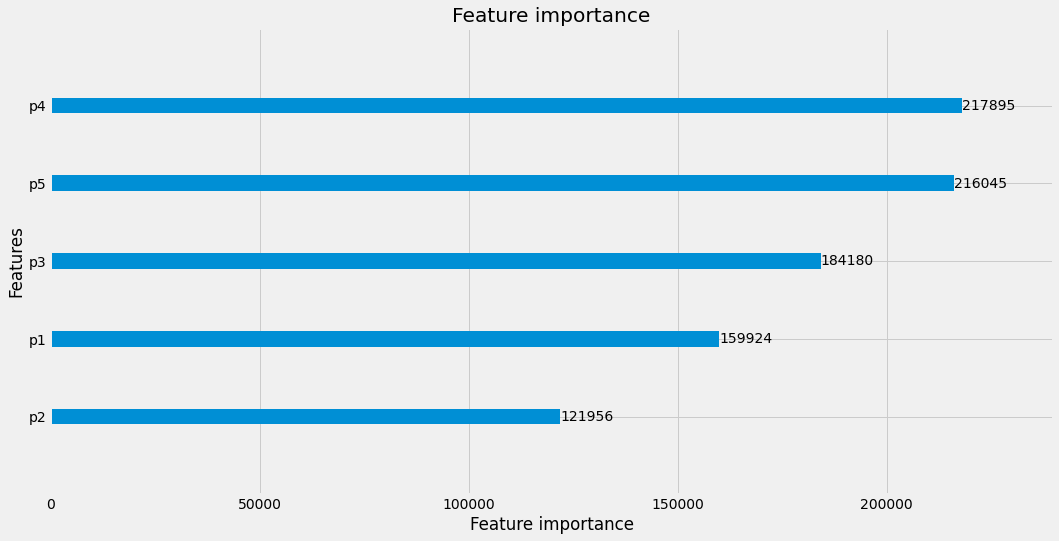

In [22]:
plot_importance(LGBM_model)

In [23]:
#예측 평가
LGBM_y_pred = LGBM_model.predict(X_test)
LGBM_y_pred

array([2., 2., 2., ..., 0., 2., 2.])

In [24]:
# 에러 
mean_squared_error(Y_test, LGBM_y_pred)

0.41318956086888575

In [26]:
#정확도
accuracy = accuracy_score(Y_test, LGBM_y_pred)
print("Accuracy: {}%".format(accuracy * 100.0))




Accuracy: 79.62806688545085%


In [ ]:
# Test set에 적용하고 submission csv 파일생성

result = model.predict(test)
Submission_set['class'] = result
Submission_set.to_csv('submission.csv', encoding='utf-8')

# feature selecting

In [17]:
target_col = 'class'
feature_col = [x for x in df_train.columns if df_train[x].dtype in [np.int64, np.float64] and x !=target_col]
print(feature_col)
pred_col='pred'




['u', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z']


In [18]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
select = SelectFromModel(LGBMClassifier(max_depth=27, learning_rate = 0.005, n_estimators = 50, boosting_type='dart'))
select.fit(df_train[feature_col],df_train[target_col])
X_train_list = select.transform(df_train[feature_col])

X_train, X_test, Y_train, Y_test = train_test_split(X_train_list, df_train[target_col], test_size=0.1, random_state=10)

LGBM_model = LGBMClassifier(max_depth=27, learning_rate = 0.005, n_estimators = 15000, boosting_type='dart')
LGBM_model.fit(X_train, Y_train, early_stopping_rounds= 1500, eval_metric='logloss', eval_set=[(X_test,Y_test)])
df_train['pred'] = LGBM_model.predict(X_test)
print(f' RMSE:\t{rmse(Y_test, df_train[pred_col]):12.2f}')
print(f' RMSLE:\t{rmsle(Y_test, df_train[pred_col]):12.2f}')
print(f' ACCURACY:\t{accuracy_score(Y_test, df_train[pred_col])}')

[1]	valid_0's multi_logloss: 0.977538
[2]	valid_0's multi_logloss: 0.970837
[3]	valid_0's multi_logloss: 0.964231
[4]	valid_0's multi_logloss: 0.957714
[5]	valid_0's multi_logloss: 0.951286
[6]	valid_0's multi_logloss: 0.94493
[7]	valid_0's multi_logloss: 0.93864
[8]	valid_0's multi_logloss: 0.94081
[9]	valid_0's multi_logloss: 0.934579
[10]	valid_0's multi_logloss: 0.928425
[11]	valid_0's multi_logloss: 0.922334
[12]	valid_0's multi_logloss: 0.924414
[13]	valid_0's multi_logloss: 0.918371
[14]	valid_0's multi_logloss: 0.912427
[15]	valid_0's multi_logloss: 0.906532
[16]	valid_0's multi_logloss: 0.900714
[17]	valid_0's multi_logloss: 0.894954
[18]	valid_0's multi_logloss: 0.889267
[19]	valid_0's multi_logloss: 0.883636
[20]	valid_0's multi_logloss: 0.878077
[21]	valid_0's multi_logloss: 0.879406
[22]	valid_0's multi_logloss: 0.873892
[23]	valid_0's multi_logloss: 0.868461
[24]	valid_0's multi_logloss: 0.863077
[25]	valid_0's multi_logloss: 0.857761
[26]	valid_0's multi_logloss: 0.85249

[210]	valid_0's multi_logloss: 0.70251
[211]	valid_0's multi_logloss: 0.704321
[212]	valid_0's multi_logloss: 0.700705
[213]	valid_0's multi_logloss: 0.697127
[214]	valid_0's multi_logloss: 0.693573
[215]	valid_0's multi_logloss: 0.690058
[216]	valid_0's multi_logloss: 0.692072
[217]	valid_0's multi_logloss: 0.68857
[218]	valid_0's multi_logloss: 0.68509
[219]	valid_0's multi_logloss: 0.688324
[220]	valid_0's multi_logloss: 0.684847
[221]	valid_0's multi_logloss: 0.686798
[222]	valid_0's multi_logloss: 0.683341
[223]	valid_0's multi_logloss: 0.679914
[224]	valid_0's multi_logloss: 0.681967
[225]	valid_0's multi_logloss: 0.684217
[226]	valid_0's multi_logloss: 0.686011
[227]	valid_0's multi_logloss: 0.687389
[228]	valid_0's multi_logloss: 0.683921
[229]	valid_0's multi_logloss: 0.685681
[230]	valid_0's multi_logloss: 0.682234
[231]	valid_0's multi_logloss: 0.678811
[232]	valid_0's multi_logloss: 0.675424
[233]	valid_0's multi_logloss: 0.677149
[234]	valid_0's multi_logloss: 0.673779
[23

[417]	valid_0's multi_logloss: 0.521561
[418]	valid_0's multi_logloss: 0.523009
[419]	valid_0's multi_logloss: 0.520916
[420]	valid_0's multi_logloss: 0.522303
[421]	valid_0's multi_logloss: 0.520214
[422]	valid_0's multi_logloss: 0.518139
[423]	valid_0's multi_logloss: 0.516084
[424]	valid_0's multi_logloss: 0.51404
[425]	valid_0's multi_logloss: 0.51546
[426]	valid_0's multi_logloss: 0.513425
[427]	valid_0's multi_logloss: 0.5114
[428]	valid_0's multi_logloss: 0.512831
[429]	valid_0's multi_logloss: 0.510816
[430]	valid_0's multi_logloss: 0.512565
[431]	valid_0's multi_logloss: 0.510556
[432]	valid_0's multi_logloss: 0.508554
[433]	valid_0's multi_logloss: 0.506566
[434]	valid_0's multi_logloss: 0.507911
[435]	valid_0's multi_logloss: 0.50919
[436]	valid_0's multi_logloss: 0.507206
[437]	valid_0's multi_logloss: 0.505235
[438]	valid_0's multi_logloss: 0.506445
[439]	valid_0's multi_logloss: 0.508105
[440]	valid_0's multi_logloss: 0.506121
[441]	valid_0's multi_logloss: 0.504157
[442]

[624]	valid_0's multi_logloss: 0.432183
[625]	valid_0's multi_logloss: 0.430774
[626]	valid_0's multi_logloss: 0.42938
[627]	valid_0's multi_logloss: 0.427999
[628]	valid_0's multi_logloss: 0.42662
[629]	valid_0's multi_logloss: 0.427443
[630]	valid_0's multi_logloss: 0.428269
[631]	valid_0's multi_logloss: 0.426891
[632]	valid_0's multi_logloss: 0.425521
[633]	valid_0's multi_logloss: 0.426312
[634]	valid_0's multi_logloss: 0.42714
[635]	valid_0's multi_logloss: 0.425773
[636]	valid_0's multi_logloss: 0.424418
[637]	valid_0's multi_logloss: 0.423068
[638]	valid_0's multi_logloss: 0.423895
[639]	valid_0's multi_logloss: 0.424768
[640]	valid_0's multi_logloss: 0.423423
[641]	valid_0's multi_logloss: 0.424222
[642]	valid_0's multi_logloss: 0.424883
[643]	valid_0's multi_logloss: 0.423533
[644]	valid_0's multi_logloss: 0.424351
[645]	valid_0's multi_logloss: 0.422999
[646]	valid_0's multi_logloss: 0.421668
[647]	valid_0's multi_logloss: 0.420337
[648]	valid_0's multi_logloss: 0.41902
[649

[830]	valid_0's multi_logloss: 0.373898
[831]	valid_0's multi_logloss: 0.372914
[832]	valid_0's multi_logloss: 0.371934
[833]	valid_0's multi_logloss: 0.37096
[834]	valid_0's multi_logloss: 0.371422
[835]	valid_0's multi_logloss: 0.371854
[836]	valid_0's multi_logloss: 0.370882
[837]	valid_0's multi_logloss: 0.369915
[838]	valid_0's multi_logloss: 0.370544
[839]	valid_0's multi_logloss: 0.369577
[840]	valid_0's multi_logloss: 0.368621
[841]	valid_0's multi_logloss: 0.367669
[842]	valid_0's multi_logloss: 0.366725
[843]	valid_0's multi_logloss: 0.365786
[844]	valid_0's multi_logloss: 0.36629
[845]	valid_0's multi_logloss: 0.366817
[846]	valid_0's multi_logloss: 0.367304
[847]	valid_0's multi_logloss: 0.366366
[848]	valid_0's multi_logloss: 0.366895
[849]	valid_0's multi_logloss: 0.36733
[850]	valid_0's multi_logloss: 0.366388
[851]	valid_0's multi_logloss: 0.366881
[852]	valid_0's multi_logloss: 0.365941
[853]	valid_0's multi_logloss: 0.365009
[854]	valid_0's multi_logloss: 0.365445
[85

[1035]	valid_0's multi_logloss: 0.32899
[1036]	valid_0's multi_logloss: 0.328309
[1037]	valid_0's multi_logloss: 0.327632
[1038]	valid_0's multi_logloss: 0.328022
[1039]	valid_0's multi_logloss: 0.328314
[1040]	valid_0's multi_logloss: 0.328652
[1041]	valid_0's multi_logloss: 0.32798
[1042]	valid_0's multi_logloss: 0.328374
[1043]	valid_0's multi_logloss: 0.327705
[1044]	valid_0's multi_logloss: 0.327038
[1045]	valid_0's multi_logloss: 0.326366
[1046]	valid_0's multi_logloss: 0.326662
[1047]	valid_0's multi_logloss: 0.327045
[1048]	valid_0's multi_logloss: 0.326382
[1049]	valid_0's multi_logloss: 0.326714
[1050]	valid_0's multi_logloss: 0.326051
[1051]	valid_0's multi_logloss: 0.326295
[1052]	valid_0's multi_logloss: 0.326561
[1053]	valid_0's multi_logloss: 0.325904
[1054]	valid_0's multi_logloss: 0.325245
[1055]	valid_0's multi_logloss: 0.325597
[1056]	valid_0's multi_logloss: 0.324943
[1057]	valid_0's multi_logloss: 0.32532
[1058]	valid_0's multi_logloss: 0.325689
[1059]	valid_0's mu

[1236]	valid_0's multi_logloss: 0.30416
[1237]	valid_0's multi_logloss: 0.30365
[1238]	valid_0's multi_logloss: 0.303883
[1239]	valid_0's multi_logloss: 0.304093
[1240]	valid_0's multi_logloss: 0.304362
[1241]	valid_0's multi_logloss: 0.304643
[1242]	valid_0's multi_logloss: 0.304126
[1243]	valid_0's multi_logloss: 0.304316
[1244]	valid_0's multi_logloss: 0.303807
[1245]	valid_0's multi_logloss: 0.303302
[1246]	valid_0's multi_logloss: 0.302798
[1247]	valid_0's multi_logloss: 0.30301
[1248]	valid_0's multi_logloss: 0.303291
[1249]	valid_0's multi_logloss: 0.30354
[1250]	valid_0's multi_logloss: 0.30303
[1251]	valid_0's multi_logloss: 0.302525
[1252]	valid_0's multi_logloss: 0.302755
[1253]	valid_0's multi_logloss: 0.302939
[1254]	valid_0's multi_logloss: 0.30243
[1255]	valid_0's multi_logloss: 0.301934
[1256]	valid_0's multi_logloss: 0.302231
[1257]	valid_0's multi_logloss: 0.30173
[1258]	valid_0's multi_logloss: 0.301966
[1259]	valid_0's multi_logloss: 0.301471
[1260]	valid_0's multi_

[1437]	valid_0's multi_logloss: 0.283015
[1438]	valid_0's multi_logloss: 0.283212
[1439]	valid_0's multi_logloss: 0.282838
[1440]	valid_0's multi_logloss: 0.282981
[1441]	valid_0's multi_logloss: 0.283111
[1442]	valid_0's multi_logloss: 0.283277
[1443]	valid_0's multi_logloss: 0.282898
[1444]	valid_0's multi_logloss: 0.283084
[1445]	valid_0's multi_logloss: 0.282704
[1446]	valid_0's multi_logloss: 0.282324
[1447]	valid_0's multi_logloss: 0.2825
[1448]	valid_0's multi_logloss: 0.282639
[1449]	valid_0's multi_logloss: 0.28284
[1450]	valid_0's multi_logloss: 0.282465
[1451]	valid_0's multi_logloss: 0.282094
[1452]	valid_0's multi_logloss: 0.28231
[1453]	valid_0's multi_logloss: 0.282449
[1454]	valid_0's multi_logloss: 0.282075
[1455]	valid_0's multi_logloss: 0.281703
[1456]	valid_0's multi_logloss: 0.281337
[1457]	valid_0's multi_logloss: 0.280967
[1458]	valid_0's multi_logloss: 0.280599
[1459]	valid_0's multi_logloss: 0.280232
[1460]	valid_0's multi_logloss: 0.280387
[1461]	valid_0's mul

[1640]	valid_0's multi_logloss: 0.266656
[1641]	valid_0's multi_logloss: 0.266816
[1642]	valid_0's multi_logloss: 0.266912
[1643]	valid_0's multi_logloss: 0.267068
[1644]	valid_0's multi_logloss: 0.267163
[1645]	valid_0's multi_logloss: 0.267297
[1646]	valid_0's multi_logloss: 0.267424
[1647]	valid_0's multi_logloss: 0.26755
[1648]	valid_0's multi_logloss: 0.267269
[1649]	valid_0's multi_logloss: 0.26743
[1650]	valid_0's multi_logloss: 0.267551
[1651]	valid_0's multi_logloss: 0.267269
[1652]	valid_0's multi_logloss: 0.2674
[1653]	valid_0's multi_logloss: 0.267118
[1654]	valid_0's multi_logloss: 0.266836
[1655]	valid_0's multi_logloss: 0.266997
[1656]	valid_0's multi_logloss: 0.266715
[1657]	valid_0's multi_logloss: 0.266435
[1658]	valid_0's multi_logloss: 0.266156
[1659]	valid_0's multi_logloss: 0.26588
[1660]	valid_0's multi_logloss: 0.265997
[1661]	valid_0's multi_logloss: 0.266136
[1662]	valid_0's multi_logloss: 0.265864
[1663]	valid_0's multi_logloss: 0.265593
[1664]	valid_0's mult

[1842]	valid_0's multi_logloss: 0.252842
[1843]	valid_0's multi_logloss: 0.252934
[1844]	valid_0's multi_logloss: 0.253039
[1845]	valid_0's multi_logloss: 0.253124
[1846]	valid_0's multi_logloss: 0.25293
[1847]	valid_0's multi_logloss: 0.253018
[1848]	valid_0's multi_logloss: 0.252825
[1849]	valid_0's multi_logloss: 0.252631
[1850]	valid_0's multi_logloss: 0.252437
[1851]	valid_0's multi_logloss: 0.252505
[1852]	valid_0's multi_logloss: 0.252572
[1853]	valid_0's multi_logloss: 0.252654
[1854]	valid_0's multi_logloss: 0.252461
[1855]	valid_0's multi_logloss: 0.252556
[1856]	valid_0's multi_logloss: 0.252672
[1857]	valid_0's multi_logloss: 0.252482
[1858]	valid_0's multi_logloss: 0.252589
[1859]	valid_0's multi_logloss: 0.252396
[1860]	valid_0's multi_logloss: 0.252464
[1861]	valid_0's multi_logloss: 0.25227
[1862]	valid_0's multi_logloss: 0.252339
[1863]	valid_0's multi_logloss: 0.25215
[1864]	valid_0's multi_logloss: 0.251959
[1865]	valid_0's multi_logloss: 0.251772
[1866]	valid_0's mu

[2044]	valid_0's multi_logloss: 0.244003
[2045]	valid_0's multi_logloss: 0.243861
[2046]	valid_0's multi_logloss: 0.243914
[2047]	valid_0's multi_logloss: 0.243772
[2048]	valid_0's multi_logloss: 0.243831
[2049]	valid_0's multi_logloss: 0.243889
[2050]	valid_0's multi_logloss: 0.243952
[2051]	valid_0's multi_logloss: 0.243808
[2052]	valid_0's multi_logloss: 0.243668
[2053]	valid_0's multi_logloss: 0.243528
[2054]	valid_0's multi_logloss: 0.243392
[2055]	valid_0's multi_logloss: 0.243258
[2056]	valid_0's multi_logloss: 0.24334
[2057]	valid_0's multi_logloss: 0.243387
[2058]	valid_0's multi_logloss: 0.243448
[2059]	valid_0's multi_logloss: 0.243307
[2060]	valid_0's multi_logloss: 0.243369
[2061]	valid_0's multi_logloss: 0.243415
[2062]	valid_0's multi_logloss: 0.243469
[2063]	valid_0's multi_logloss: 0.243529
[2064]	valid_0's multi_logloss: 0.243588
[2065]	valid_0's multi_logloss: 0.243646
[2066]	valid_0's multi_logloss: 0.243719
[2067]	valid_0's multi_logloss: 0.243574
[2068]	valid_0's 

[2247]	valid_0's multi_logloss: 0.23696
[2248]	valid_0's multi_logloss: 0.237005
[2249]	valid_0's multi_logloss: 0.2369
[2250]	valid_0's multi_logloss: 0.236796
[2251]	valid_0's multi_logloss: 0.236692
[2252]	valid_0's multi_logloss: 0.23659
[2253]	valid_0's multi_logloss: 0.23649
[2254]	valid_0's multi_logloss: 0.236388
[2255]	valid_0's multi_logloss: 0.236286
[2256]	valid_0's multi_logloss: 0.236188
[2257]	valid_0's multi_logloss: 0.23609
[2258]	valid_0's multi_logloss: 0.235995
[2259]	valid_0's multi_logloss: 0.235893
[2260]	valid_0's multi_logloss: 0.23593
[2261]	valid_0's multi_logloss: 0.235831
[2262]	valid_0's multi_logloss: 0.235735
[2263]	valid_0's multi_logloss: 0.235791
[2264]	valid_0's multi_logloss: 0.235698
[2265]	valid_0's multi_logloss: 0.235735
[2266]	valid_0's multi_logloss: 0.235779
[2267]	valid_0's multi_logloss: 0.235822
[2268]	valid_0's multi_logloss: 0.235866
[2269]	valid_0's multi_logloss: 0.23593
[2270]	valid_0's multi_logloss: 0.235831
[2271]	valid_0's multi_l

[2448]	valid_0's multi_logloss: 0.23107
[2449]	valid_0's multi_logloss: 0.230996
[2450]	valid_0's multi_logloss: 0.231032
[2451]	valid_0's multi_logloss: 0.23096
[2452]	valid_0's multi_logloss: 0.23089
[2453]	valid_0's multi_logloss: 0.230923
[2454]	valid_0's multi_logloss: 0.230848
[2455]	valid_0's multi_logloss: 0.230778
[2456]	valid_0's multi_logloss: 0.230825
[2457]	valid_0's multi_logloss: 0.230861
[2458]	valid_0's multi_logloss: 0.230786
[2459]	valid_0's multi_logloss: 0.230715
[2460]	valid_0's multi_logloss: 0.230644
[2461]	valid_0's multi_logloss: 0.230573
[2462]	valid_0's multi_logloss: 0.230622
[2463]	valid_0's multi_logloss: 0.230653
[2464]	valid_0's multi_logloss: 0.230689
[2465]	valid_0's multi_logloss: 0.230616
[2466]	valid_0's multi_logloss: 0.230547
[2467]	valid_0's multi_logloss: 0.230477
[2468]	valid_0's multi_logloss: 0.230497
[2469]	valid_0's multi_logloss: 0.230527
[2470]	valid_0's multi_logloss: 0.230458
[2471]	valid_0's multi_logloss: 0.230387
[2472]	valid_0's mu

[2649]	valid_0's multi_logloss: 0.227912
[2650]	valid_0's multi_logloss: 0.227935
[2651]	valid_0's multi_logloss: 0.227959
[2652]	valid_0's multi_logloss: 0.227983
[2653]	valid_0's multi_logloss: 0.227924
[2654]	valid_0's multi_logloss: 0.227862
[2655]	valid_0's multi_logloss: 0.227888
[2656]	valid_0's multi_logloss: 0.227829
[2657]	valid_0's multi_logloss: 0.227858
[2658]	valid_0's multi_logloss: 0.227803
[2659]	valid_0's multi_logloss: 0.227744
[2660]	valid_0's multi_logloss: 0.227687
[2661]	valid_0's multi_logloss: 0.227712
[2662]	valid_0's multi_logloss: 0.227739
[2663]	valid_0's multi_logloss: 0.227682
[2664]	valid_0's multi_logloss: 0.227627
[2665]	valid_0's multi_logloss: 0.227657
[2666]	valid_0's multi_logloss: 0.227698
[2667]	valid_0's multi_logloss: 0.227725
[2668]	valid_0's multi_logloss: 0.227755
[2669]	valid_0's multi_logloss: 0.227799
[2670]	valid_0's multi_logloss: 0.227819
[2671]	valid_0's multi_logloss: 0.227853
[2672]	valid_0's multi_logloss: 0.227795
[2673]	valid_0's

[2853]	valid_0's multi_logloss: 0.225961
[2854]	valid_0's multi_logloss: 0.225908
[2855]	valid_0's multi_logloss: 0.225857
[2856]	valid_0's multi_logloss: 0.225874
[2857]	valid_0's multi_logloss: 0.2259
[2858]	valid_0's multi_logloss: 0.225848
[2859]	valid_0's multi_logloss: 0.225877
[2860]	valid_0's multi_logloss: 0.225908
[2861]	valid_0's multi_logloss: 0.22594
[2862]	valid_0's multi_logloss: 0.22589
[2863]	valid_0's multi_logloss: 0.225839
[2864]	valid_0's multi_logloss: 0.225788
[2865]	valid_0's multi_logloss: 0.225737
[2866]	valid_0's multi_logloss: 0.225688
[2867]	valid_0's multi_logloss: 0.225639
[2868]	valid_0's multi_logloss: 0.225658
[2869]	valid_0's multi_logloss: 0.225679
[2870]	valid_0's multi_logloss: 0.225695
[2871]	valid_0's multi_logloss: 0.225645
[2872]	valid_0's multi_logloss: 0.225597
[2873]	valid_0's multi_logloss: 0.225546
[2874]	valid_0's multi_logloss: 0.225498
[2875]	valid_0's multi_logloss: 0.225531
[2876]	valid_0's multi_logloss: 0.225549
[2877]	valid_0's mul

[3057]	valid_0's multi_logloss: 0.222977
[3058]	valid_0's multi_logloss: 0.222992
[3059]	valid_0's multi_logloss: 0.223015
[3060]	valid_0's multi_logloss: 0.223034
[3061]	valid_0's multi_logloss: 0.222994
[3062]	valid_0's multi_logloss: 0.223007
[3063]	valid_0's multi_logloss: 0.222971
[3064]	valid_0's multi_logloss: 0.222937
[3065]	valid_0's multi_logloss: 0.222964
[3066]	valid_0's multi_logloss: 0.222981
[3067]	valid_0's multi_logloss: 0.223
[3068]	valid_0's multi_logloss: 0.222962
[3069]	valid_0's multi_logloss: 0.22298
[3070]	valid_0's multi_logloss: 0.222942
[3071]	valid_0's multi_logloss: 0.222962
[3072]	valid_0's multi_logloss: 0.222978
[3073]	valid_0's multi_logloss: 0.222998
[3074]	valid_0's multi_logloss: 0.222958
[3075]	valid_0's multi_logloss: 0.222976
[3076]	valid_0's multi_logloss: 0.222935
[3077]	valid_0's multi_logloss: 0.22296
[3078]	valid_0's multi_logloss: 0.222984
[3079]	valid_0's multi_logloss: 0.222944
[3080]	valid_0's multi_logloss: 0.222962
[3081]	valid_0's mult

[3260]	valid_0's multi_logloss: 0.221274
[3261]	valid_0's multi_logloss: 0.221291
[3262]	valid_0's multi_logloss: 0.221263
[3263]	valid_0's multi_logloss: 0.221231
[3264]	valid_0's multi_logloss: 0.221247
[3265]	valid_0's multi_logloss: 0.221215
[3266]	valid_0's multi_logloss: 0.22123
[3267]	valid_0's multi_logloss: 0.221248
[3268]	valid_0's multi_logloss: 0.221259
[3269]	valid_0's multi_logloss: 0.221278
[3270]	valid_0's multi_logloss: 0.221293
[3271]	valid_0's multi_logloss: 0.22126
[3272]	valid_0's multi_logloss: 0.22123
[3273]	valid_0's multi_logloss: 0.221198
[3274]	valid_0's multi_logloss: 0.221213
[3275]	valid_0's multi_logloss: 0.221181
[3276]	valid_0's multi_logloss: 0.221149
[3277]	valid_0's multi_logloss: 0.221115
[3278]	valid_0's multi_logloss: 0.221127
[3279]	valid_0's multi_logloss: 0.221141
[3280]	valid_0's multi_logloss: 0.221107
[3281]	valid_0's multi_logloss: 0.221076
[3282]	valid_0's multi_logloss: 0.221044
[3283]	valid_0's multi_logloss: 0.221059
[3284]	valid_0's mu

[3461]	valid_0's multi_logloss: 0.219514
[3462]	valid_0's multi_logloss: 0.219484
[3463]	valid_0's multi_logloss: 0.219459
[3464]	valid_0's multi_logloss: 0.219434
[3465]	valid_0's multi_logloss: 0.219449
[3466]	valid_0's multi_logloss: 0.219422
[3467]	valid_0's multi_logloss: 0.219398
[3468]	valid_0's multi_logloss: 0.219411
[3469]	valid_0's multi_logloss: 0.219422
[3470]	valid_0's multi_logloss: 0.219437
[3471]	valid_0's multi_logloss: 0.21941
[3472]	valid_0's multi_logloss: 0.219385
[3473]	valid_0's multi_logloss: 0.2194
[3474]	valid_0's multi_logloss: 0.219378
[3475]	valid_0's multi_logloss: 0.219352
[3476]	valid_0's multi_logloss: 0.219372
[3477]	valid_0's multi_logloss: 0.219346
[3478]	valid_0's multi_logloss: 0.219324
[3479]	valid_0's multi_logloss: 0.219337
[3480]	valid_0's multi_logloss: 0.219344
[3481]	valid_0's multi_logloss: 0.219354
[3482]	valid_0's multi_logloss: 0.219328
[3483]	valid_0's multi_logloss: 0.219337
[3484]	valid_0's multi_logloss: 0.219311
[3485]	valid_0's mu

[3663]	valid_0's multi_logloss: 0.218131
[3664]	valid_0's multi_logloss: 0.218107
[3665]	valid_0's multi_logloss: 0.21812
[3666]	valid_0's multi_logloss: 0.218131
[3667]	valid_0's multi_logloss: 0.21811
[3668]	valid_0's multi_logloss: 0.218087
[3669]	valid_0's multi_logloss: 0.218095
[3670]	valid_0's multi_logloss: 0.218069
[3671]	valid_0's multi_logloss: 0.218046
[3672]	valid_0's multi_logloss: 0.218056
[3673]	valid_0's multi_logloss: 0.218067
[3674]	valid_0's multi_logloss: 0.218047
[3675]	valid_0's multi_logloss: 0.218059
[3676]	valid_0's multi_logloss: 0.218073
[3677]	valid_0's multi_logloss: 0.218052
[3678]	valid_0's multi_logloss: 0.21807
[3679]	valid_0's multi_logloss: 0.218047
[3680]	valid_0's multi_logloss: 0.218027
[3681]	valid_0's multi_logloss: 0.218002
[3682]	valid_0's multi_logloss: 0.217978
[3683]	valid_0's multi_logloss: 0.217957
[3684]	valid_0's multi_logloss: 0.21797
[3685]	valid_0's multi_logloss: 0.217947
[3686]	valid_0's multi_logloss: 0.217929
[3687]	valid_0's mul

[3865]	valid_0's multi_logloss: 0.216971
[3866]	valid_0's multi_logloss: 0.21698
[3867]	valid_0's multi_logloss: 0.216996
[3868]	valid_0's multi_logloss: 0.216976
[3869]	valid_0's multi_logloss: 0.216986
[3870]	valid_0's multi_logloss: 0.21697
[3871]	valid_0's multi_logloss: 0.216979
[3872]	valid_0's multi_logloss: 0.216961
[3873]	valid_0's multi_logloss: 0.216974
[3874]	valid_0's multi_logloss: 0.216956
[3875]	valid_0's multi_logloss: 0.216969
[3876]	valid_0's multi_logloss: 0.216951
[3877]	valid_0's multi_logloss: 0.216933
[3878]	valid_0's multi_logloss: 0.216914
[3879]	valid_0's multi_logloss: 0.216897
[3880]	valid_0's multi_logloss: 0.216905
[3881]	valid_0's multi_logloss: 0.216913
[3882]	valid_0's multi_logloss: 0.216895
[3883]	valid_0's multi_logloss: 0.216878
[3884]	valid_0's multi_logloss: 0.21689
[3885]	valid_0's multi_logloss: 0.216874
[3886]	valid_0's multi_logloss: 0.216855
[3887]	valid_0's multi_logloss: 0.216839
[3888]	valid_0's multi_logloss: 0.21685
[3889]	valid_0's mul

[4066]	valid_0's multi_logloss: 0.216231
[4067]	valid_0's multi_logloss: 0.216241
[4068]	valid_0's multi_logloss: 0.216254
[4069]	valid_0's multi_logloss: 0.216267
[4070]	valid_0's multi_logloss: 0.216252
[4071]	valid_0's multi_logloss: 0.216236
[4072]	valid_0's multi_logloss: 0.216221
[4073]	valid_0's multi_logloss: 0.216202
[4074]	valid_0's multi_logloss: 0.216188
[4075]	valid_0's multi_logloss: 0.216196
[4076]	valid_0's multi_logloss: 0.216179
[4077]	valid_0's multi_logloss: 0.216162
[4078]	valid_0's multi_logloss: 0.216147
[4079]	valid_0's multi_logloss: 0.216132
[4080]	valid_0's multi_logloss: 0.21614
[4081]	valid_0's multi_logloss: 0.216125
[4082]	valid_0's multi_logloss: 0.216136
[4083]	valid_0's multi_logloss: 0.216146
[4084]	valid_0's multi_logloss: 0.216132
[4085]	valid_0's multi_logloss: 0.21614
[4086]	valid_0's multi_logloss: 0.216152
[4087]	valid_0's multi_logloss: 0.216158
[4088]	valid_0's multi_logloss: 0.216164
[4089]	valid_0's multi_logloss: 0.216148
[4090]	valid_0's m

[4267]	valid_0's multi_logloss: 0.215664
[4268]	valid_0's multi_logloss: 0.215673
[4269]	valid_0's multi_logloss: 0.215681
[4270]	valid_0's multi_logloss: 0.215666
[4271]	valid_0's multi_logloss: 0.21567
[4272]	valid_0's multi_logloss: 0.215679
[4273]	valid_0's multi_logloss: 0.215688
[4274]	valid_0's multi_logloss: 0.215695
[4275]	valid_0's multi_logloss: 0.215706
[4276]	valid_0's multi_logloss: 0.215692
[4277]	valid_0's multi_logloss: 0.215703
[4278]	valid_0's multi_logloss: 0.215708
[4279]	valid_0's multi_logloss: 0.215694
[4280]	valid_0's multi_logloss: 0.215681
[4281]	valid_0's multi_logloss: 0.215693
[4282]	valid_0's multi_logloss: 0.215677
[4283]	valid_0's multi_logloss: 0.215661
[4284]	valid_0's multi_logloss: 0.215646
[4285]	valid_0's multi_logloss: 0.215633
[4286]	valid_0's multi_logloss: 0.215618
[4287]	valid_0's multi_logloss: 0.215627
[4288]	valid_0's multi_logloss: 0.215637
[4289]	valid_0's multi_logloss: 0.215648
[4290]	valid_0's multi_logloss: 0.215655
[4291]	valid_0's 

[4470]	valid_0's multi_logloss: 0.215261
[4471]	valid_0's multi_logloss: 0.215267
[4472]	valid_0's multi_logloss: 0.215252
[4473]	valid_0's multi_logloss: 0.215262
[4474]	valid_0's multi_logloss: 0.215251
[4475]	valid_0's multi_logloss: 0.215259
[4476]	valid_0's multi_logloss: 0.215268
[4477]	valid_0's multi_logloss: 0.215252
[4478]	valid_0's multi_logloss: 0.215237
[4479]	valid_0's multi_logloss: 0.215246
[4480]	valid_0's multi_logloss: 0.215232
[4481]	valid_0's multi_logloss: 0.215216
[4482]	valid_0's multi_logloss: 0.215226
[4483]	valid_0's multi_logloss: 0.215237
[4484]	valid_0's multi_logloss: 0.215243
[4485]	valid_0's multi_logloss: 0.215252
[4486]	valid_0's multi_logloss: 0.215239
[4487]	valid_0's multi_logloss: 0.215224
[4488]	valid_0's multi_logloss: 0.215229
[4489]	valid_0's multi_logloss: 0.215238
[4490]	valid_0's multi_logloss: 0.215247
[4491]	valid_0's multi_logloss: 0.215231
[4492]	valid_0's multi_logloss: 0.215236
[4493]	valid_0's multi_logloss: 0.215243
[4494]	valid_0's

[4671]	valid_0's multi_logloss: 0.214932
[4672]	valid_0's multi_logloss: 0.214919
[4673]	valid_0's multi_logloss: 0.21493
[4674]	valid_0's multi_logloss: 0.214935
[4675]	valid_0's multi_logloss: 0.214922
[4676]	valid_0's multi_logloss: 0.214928
[4677]	valid_0's multi_logloss: 0.214913
[4678]	valid_0's multi_logloss: 0.214902
[4679]	valid_0's multi_logloss: 0.214911
[4680]	valid_0's multi_logloss: 0.214915
[4681]	valid_0's multi_logloss: 0.214923
[4682]	valid_0's multi_logloss: 0.214908
[4683]	valid_0's multi_logloss: 0.214894
[4684]	valid_0's multi_logloss: 0.214879
[4685]	valid_0's multi_logloss: 0.214865
[4686]	valid_0's multi_logloss: 0.214872
[4687]	valid_0's multi_logloss: 0.214858
[4688]	valid_0's multi_logloss: 0.214845
[4689]	valid_0's multi_logloss: 0.21483
[4690]	valid_0's multi_logloss: 0.214819
[4691]	valid_0's multi_logloss: 0.214825
[4692]	valid_0's multi_logloss: 0.214831
[4693]	valid_0's multi_logloss: 0.214837
[4694]	valid_0's multi_logloss: 0.214843
[4695]	valid_0's m

[4872]	valid_0's multi_logloss: 0.214405
[4873]	valid_0's multi_logloss: 0.214391
[4874]	valid_0's multi_logloss: 0.214379
[4875]	valid_0's multi_logloss: 0.214365
[4876]	valid_0's multi_logloss: 0.214369
[4877]	valid_0's multi_logloss: 0.214376
[4878]	valid_0's multi_logloss: 0.214363
[4879]	valid_0's multi_logloss: 0.214349
[4880]	valid_0's multi_logloss: 0.214336
[4881]	valid_0's multi_logloss: 0.214344
[4882]	valid_0's multi_logloss: 0.214348
[4883]	valid_0's multi_logloss: 0.214335
[4884]	valid_0's multi_logloss: 0.214341
[4885]	valid_0's multi_logloss: 0.214327
[4886]	valid_0's multi_logloss: 0.214334
[4887]	valid_0's multi_logloss: 0.214322
[4888]	valid_0's multi_logloss: 0.214309
[4889]	valid_0's multi_logloss: 0.214298
[4890]	valid_0's multi_logloss: 0.214283
[4891]	valid_0's multi_logloss: 0.214272
[4892]	valid_0's multi_logloss: 0.21428
[4893]	valid_0's multi_logloss: 0.214288
[4894]	valid_0's multi_logloss: 0.214296
[4895]	valid_0's multi_logloss: 0.214284
[4896]	valid_0's 

[5074]	valid_0's multi_logloss: 0.213752
[5075]	valid_0's multi_logloss: 0.213744
[5076]	valid_0's multi_logloss: 0.213733
[5077]	valid_0's multi_logloss: 0.213722
[5078]	valid_0's multi_logloss: 0.213712
[5079]	valid_0's multi_logloss: 0.21372
[5080]	valid_0's multi_logloss: 0.213724
[5081]	valid_0's multi_logloss: 0.213711
[5082]	valid_0's multi_logloss: 0.213715
[5083]	valid_0's multi_logloss: 0.213707
[5084]	valid_0's multi_logloss: 0.213712
[5085]	valid_0's multi_logloss: 0.213719
[5086]	valid_0's multi_logloss: 0.213724
[5087]	valid_0's multi_logloss: 0.21373
[5088]	valid_0's multi_logloss: 0.213719
[5089]	valid_0's multi_logloss: 0.213708
[5090]	valid_0's multi_logloss: 0.213714
[5091]	valid_0's multi_logloss: 0.213705
[5092]	valid_0's multi_logloss: 0.213697
[5093]	valid_0's multi_logloss: 0.213684
[5094]	valid_0's multi_logloss: 0.213689
[5095]	valid_0's multi_logloss: 0.213695
[5096]	valid_0's multi_logloss: 0.213702
[5097]	valid_0's multi_logloss: 0.213707
[5098]	valid_0's m

[5278]	valid_0's multi_logloss: 0.213271
[5279]	valid_0's multi_logloss: 0.213262
[5280]	valid_0's multi_logloss: 0.213266
[5281]	valid_0's multi_logloss: 0.213257
[5282]	valid_0's multi_logloss: 0.213265
[5283]	valid_0's multi_logloss: 0.213256
[5284]	valid_0's multi_logloss: 0.213246
[5285]	valid_0's multi_logloss: 0.213235
[5286]	valid_0's multi_logloss: 0.213243
[5287]	valid_0's multi_logloss: 0.213249
[5288]	valid_0's multi_logloss: 0.213241
[5289]	valid_0's multi_logloss: 0.213232
[5290]	valid_0's multi_logloss: 0.213236
[5291]	valid_0's multi_logloss: 0.213226
[5292]	valid_0's multi_logloss: 0.21322
[5293]	valid_0's multi_logloss: 0.213224
[5294]	valid_0's multi_logloss: 0.213229
[5295]	valid_0's multi_logloss: 0.21322
[5296]	valid_0's multi_logloss: 0.213212
[5297]	valid_0's multi_logloss: 0.213201
[5298]	valid_0's multi_logloss: 0.213204
[5299]	valid_0's multi_logloss: 0.213196
[5300]	valid_0's multi_logloss: 0.213184
[5301]	valid_0's multi_logloss: 0.213192
[5302]	valid_0's m

[5480]	valid_0's multi_logloss: 0.212714
[5481]	valid_0's multi_logloss: 0.212708
[5482]	valid_0's multi_logloss: 0.212702
[5483]	valid_0's multi_logloss: 0.212694
[5484]	valid_0's multi_logloss: 0.212689
[5485]	valid_0's multi_logloss: 0.212693
[5486]	valid_0's multi_logloss: 0.212686
[5487]	valid_0's multi_logloss: 0.21268
[5488]	valid_0's multi_logloss: 0.212686
[5489]	valid_0's multi_logloss: 0.21268
[5490]	valid_0's multi_logloss: 0.212685
[5491]	valid_0's multi_logloss: 0.212678
[5492]	valid_0's multi_logloss: 0.212671
[5493]	valid_0's multi_logloss: 0.212675
[5494]	valid_0's multi_logloss: 0.212679
[5495]	valid_0's multi_logloss: 0.212684
[5496]	valid_0's multi_logloss: 0.212689
[5497]	valid_0's multi_logloss: 0.21268
[5498]	valid_0's multi_logloss: 0.212686
[5499]	valid_0's multi_logloss: 0.212681
[5500]	valid_0's multi_logloss: 0.212684
[5501]	valid_0's multi_logloss: 0.212674
[5502]	valid_0's multi_logloss: 0.212681
[5503]	valid_0's multi_logloss: 0.212674
[5504]	valid_0's mu

[5682]	valid_0's multi_logloss: 0.212347
[5683]	valid_0's multi_logloss: 0.212351
[5684]	valid_0's multi_logloss: 0.212344
[5685]	valid_0's multi_logloss: 0.212349
[5686]	valid_0's multi_logloss: 0.212354
[5687]	valid_0's multi_logloss: 0.212361
[5688]	valid_0's multi_logloss: 0.212366
[5689]	valid_0's multi_logloss: 0.212359
[5690]	valid_0's multi_logloss: 0.212351
[5691]	valid_0's multi_logloss: 0.212341
[5692]	valid_0's multi_logloss: 0.212344
[5693]	valid_0's multi_logloss: 0.212347
[5694]	valid_0's multi_logloss: 0.212351
[5695]	valid_0's multi_logloss: 0.212344
[5696]	valid_0's multi_logloss: 0.212349
[5697]	valid_0's multi_logloss: 0.212343
[5698]	valid_0's multi_logloss: 0.212335
[5699]	valid_0's multi_logloss: 0.21234
[5700]	valid_0's multi_logloss: 0.212334
[5701]	valid_0's multi_logloss: 0.212337
[5702]	valid_0's multi_logloss: 0.212341
[5703]	valid_0's multi_logloss: 0.212346
[5704]	valid_0's multi_logloss: 0.212349
[5705]	valid_0's multi_logloss: 0.212353
[5706]	valid_0's 

[5887]	valid_0's multi_logloss: 0.212213
[5888]	valid_0's multi_logloss: 0.212208
[5889]	valid_0's multi_logloss: 0.212199
[5890]	valid_0's multi_logloss: 0.212204
[5891]	valid_0's multi_logloss: 0.212196
[5892]	valid_0's multi_logloss: 0.212189
[5893]	valid_0's multi_logloss: 0.212194
[5894]	valid_0's multi_logloss: 0.212186
[5895]	valid_0's multi_logloss: 0.212189
[5896]	valid_0's multi_logloss: 0.212193
[5897]	valid_0's multi_logloss: 0.212185
[5898]	valid_0's multi_logloss: 0.212175
[5899]	valid_0's multi_logloss: 0.212168
[5900]	valid_0's multi_logloss: 0.212172
[5901]	valid_0's multi_logloss: 0.212176
[5902]	valid_0's multi_logloss: 0.212179
[5903]	valid_0's multi_logloss: 0.212183
[5904]	valid_0's multi_logloss: 0.212174
[5905]	valid_0's multi_logloss: 0.212178
[5906]	valid_0's multi_logloss: 0.212181
[5907]	valid_0's multi_logloss: 0.212174
[5908]	valid_0's multi_logloss: 0.212178
[5909]	valid_0's multi_logloss: 0.212181
[5910]	valid_0's multi_logloss: 0.212176
[5911]	valid_0's

[6094]	valid_0's multi_logloss: 0.211875
[6095]	valid_0's multi_logloss: 0.211879
[6096]	valid_0's multi_logloss: 0.211882
[6097]	valid_0's multi_logloss: 0.211876
[6098]	valid_0's multi_logloss: 0.211879
[6099]	valid_0's multi_logloss: 0.211872
[6100]	valid_0's multi_logloss: 0.211878
[6101]	valid_0's multi_logloss: 0.211871
[6102]	valid_0's multi_logloss: 0.211864
[6103]	valid_0's multi_logloss: 0.211869
[6104]	valid_0's multi_logloss: 0.211861
[6105]	valid_0's multi_logloss: 0.211864
[6106]	valid_0's multi_logloss: 0.211868
[6107]	valid_0's multi_logloss: 0.211872
[6108]	valid_0's multi_logloss: 0.211876
[6109]	valid_0's multi_logloss: 0.211867
[6110]	valid_0's multi_logloss: 0.211869
[6111]	valid_0's multi_logloss: 0.211873
[6112]	valid_0's multi_logloss: 0.211867
[6113]	valid_0's multi_logloss: 0.211871
[6114]	valid_0's multi_logloss: 0.211874
[6115]	valid_0's multi_logloss: 0.211879
[6116]	valid_0's multi_logloss: 0.211882
[6117]	valid_0's multi_logloss: 0.211885
[6118]	valid_0's

[6296]	valid_0's multi_logloss: 0.211596
[6297]	valid_0's multi_logloss: 0.2116
[6298]	valid_0's multi_logloss: 0.211602
[6299]	valid_0's multi_logloss: 0.211596
[6300]	valid_0's multi_logloss: 0.211588
[6301]	valid_0's multi_logloss: 0.211591
[6302]	valid_0's multi_logloss: 0.211595
[6303]	valid_0's multi_logloss: 0.211599
[6304]	valid_0's multi_logloss: 0.211602
[6305]	valid_0's multi_logloss: 0.211597
[6306]	valid_0's multi_logloss: 0.2116
[6307]	valid_0's multi_logloss: 0.211603
[6308]	valid_0's multi_logloss: 0.211599
[6309]	valid_0's multi_logloss: 0.211603
[6310]	valid_0's multi_logloss: 0.211608
[6311]	valid_0's multi_logloss: 0.211601
[6312]	valid_0's multi_logloss: 0.211606
[6313]	valid_0's multi_logloss: 0.211599
[6314]	valid_0's multi_logloss: 0.211602
[6315]	valid_0's multi_logloss: 0.211595
[6316]	valid_0's multi_logloss: 0.211598
[6317]	valid_0's multi_logloss: 0.21159
[6318]	valid_0's multi_logloss: 0.211596
[6319]	valid_0's multi_logloss: 0.211589
[6320]	valid_0's mult

[6499]	valid_0's multi_logloss: 0.211334
[6500]	valid_0's multi_logloss: 0.211338
[6501]	valid_0's multi_logloss: 0.21133
[6502]	valid_0's multi_logloss: 0.211322
[6503]	valid_0's multi_logloss: 0.211316
[6504]	valid_0's multi_logloss: 0.211319
[6505]	valid_0's multi_logloss: 0.21131
[6506]	valid_0's multi_logloss: 0.211313
[6507]	valid_0's multi_logloss: 0.211307
[6508]	valid_0's multi_logloss: 0.211301
[6509]	valid_0's multi_logloss: 0.211294
[6510]	valid_0's multi_logloss: 0.211299
[6511]	valid_0's multi_logloss: 0.211302
[6512]	valid_0's multi_logloss: 0.21129
[6513]	valid_0's multi_logloss: 0.211293
[6514]	valid_0's multi_logloss: 0.211287
[6515]	valid_0's multi_logloss: 0.21129
[6516]	valid_0's multi_logloss: 0.211285
[6517]	valid_0's multi_logloss: 0.211288
[6518]	valid_0's multi_logloss: 0.21128
[6519]	valid_0's multi_logloss: 0.211272
[6520]	valid_0's multi_logloss: 0.211277
[6521]	valid_0's multi_logloss: 0.211282
[6522]	valid_0's multi_logloss: 0.211286
[6523]	valid_0's mult

[6702]	valid_0's multi_logloss: 0.21111
[6703]	valid_0's multi_logloss: 0.211104
[6704]	valid_0's multi_logloss: 0.211097
[6705]	valid_0's multi_logloss: 0.2111
[6706]	valid_0's multi_logloss: 0.211106
[6707]	valid_0's multi_logloss: 0.211103
[6708]	valid_0's multi_logloss: 0.211099
[6709]	valid_0's multi_logloss: 0.211102
[6710]	valid_0's multi_logloss: 0.211096
[6711]	valid_0's multi_logloss: 0.211098
[6712]	valid_0's multi_logloss: 0.211101
[6713]	valid_0's multi_logloss: 0.211096
[6714]	valid_0's multi_logloss: 0.211092
[6715]	valid_0's multi_logloss: 0.211095
[6716]	valid_0's multi_logloss: 0.211098
[6717]	valid_0's multi_logloss: 0.211103
[6718]	valid_0's multi_logloss: 0.211097
[6719]	valid_0's multi_logloss: 0.2111
[6720]	valid_0's multi_logloss: 0.211095
[6721]	valid_0's multi_logloss: 0.211097
[6722]	valid_0's multi_logloss: 0.211092
[6723]	valid_0's multi_logloss: 0.211086
[6724]	valid_0's multi_logloss: 0.21108
[6725]	valid_0's multi_logloss: 0.211074
[6726]	valid_0's multi

[6907]	valid_0's multi_logloss: 0.210879
[6908]	valid_0's multi_logloss: 0.210875
[6909]	valid_0's multi_logloss: 0.210878
[6910]	valid_0's multi_logloss: 0.210882
[6911]	valid_0's multi_logloss: 0.210877
[6912]	valid_0's multi_logloss: 0.210879
[6913]	valid_0's multi_logloss: 0.210883
[6914]	valid_0's multi_logloss: 0.210877
[6915]	valid_0's multi_logloss: 0.210874
[6916]	valid_0's multi_logloss: 0.210877
[6917]	valid_0's multi_logloss: 0.21088
[6918]	valid_0's multi_logloss: 0.210883
[6919]	valid_0's multi_logloss: 0.210878
[6920]	valid_0's multi_logloss: 0.21088
[6921]	valid_0's multi_logloss: 0.210875
[6922]	valid_0's multi_logloss: 0.210881
[6923]	valid_0's multi_logloss: 0.210883
[6924]	valid_0's multi_logloss: 0.210887
[6925]	valid_0's multi_logloss: 0.21089
[6926]	valid_0's multi_logloss: 0.210892
[6927]	valid_0's multi_logloss: 0.210896
[6928]	valid_0's multi_logloss: 0.21089
[6929]	valid_0's multi_logloss: 0.210893
[6930]	valid_0's multi_logloss: 0.210895
[6931]	valid_0's mul

[7108]	valid_0's multi_logloss: 0.210732
[7109]	valid_0's multi_logloss: 0.210735
[7110]	valid_0's multi_logloss: 0.210737
[7111]	valid_0's multi_logloss: 0.210731
[7112]	valid_0's multi_logloss: 0.210725
[7113]	valid_0's multi_logloss: 0.210727
[7114]	valid_0's multi_logloss: 0.210722
[7115]	valid_0's multi_logloss: 0.210725
[7116]	valid_0's multi_logloss: 0.21072
[7117]	valid_0's multi_logloss: 0.210723
[7118]	valid_0's multi_logloss: 0.210727
[7119]	valid_0's multi_logloss: 0.210722
[7120]	valid_0's multi_logloss: 0.210727
[7121]	valid_0's multi_logloss: 0.210722
[7122]	valid_0's multi_logloss: 0.210716
[7123]	valid_0's multi_logloss: 0.210712
[7124]	valid_0's multi_logloss: 0.210716
[7125]	valid_0's multi_logloss: 0.210709
[7126]	valid_0's multi_logloss: 0.210702
[7127]	valid_0's multi_logloss: 0.210705
[7128]	valid_0's multi_logloss: 0.210699
[7129]	valid_0's multi_logloss: 0.210702
[7130]	valid_0's multi_logloss: 0.210705
[7131]	valid_0's multi_logloss: 0.210707
[7132]	valid_0's 

[7315]	valid_0's multi_logloss: 0.210524
[7316]	valid_0's multi_logloss: 0.210526
[7317]	valid_0's multi_logloss: 0.210529
[7318]	valid_0's multi_logloss: 0.210525
[7319]	valid_0's multi_logloss: 0.210519
[7320]	valid_0's multi_logloss: 0.210514
[7321]	valid_0's multi_logloss: 0.210518
[7322]	valid_0's multi_logloss: 0.21052
[7323]	valid_0's multi_logloss: 0.210515
[7324]	valid_0's multi_logloss: 0.210511
[7325]	valid_0's multi_logloss: 0.210513
[7326]	valid_0's multi_logloss: 0.210516
[7327]	valid_0's multi_logloss: 0.210518
[7328]	valid_0's multi_logloss: 0.210514
[7329]	valid_0's multi_logloss: 0.210516
[7330]	valid_0's multi_logloss: 0.210511
[7331]	valid_0's multi_logloss: 0.210514
[7332]	valid_0's multi_logloss: 0.210509
[7333]	valid_0's multi_logloss: 0.210506
[7334]	valid_0's multi_logloss: 0.210509
[7335]	valid_0's multi_logloss: 0.210503
[7336]	valid_0's multi_logloss: 0.210498
[7337]	valid_0's multi_logloss: 0.210495
[7338]	valid_0's multi_logloss: 0.210497
[7339]	valid_0's 

[7517]	valid_0's multi_logloss: 0.210286
[7518]	valid_0's multi_logloss: 0.210288
[7519]	valid_0's multi_logloss: 0.21029
[7520]	valid_0's multi_logloss: 0.210286
[7521]	valid_0's multi_logloss: 0.210288
[7522]	valid_0's multi_logloss: 0.210283
[7523]	valid_0's multi_logloss: 0.210279
[7524]	valid_0's multi_logloss: 0.210281
[7525]	valid_0's multi_logloss: 0.210277
[7526]	valid_0's multi_logloss: 0.210273
[7527]	valid_0's multi_logloss: 0.210274
[7528]	valid_0's multi_logloss: 0.210277
[7529]	valid_0's multi_logloss: 0.210279
[7530]	valid_0's multi_logloss: 0.210282
[7531]	valid_0's multi_logloss: 0.210284
[7532]	valid_0's multi_logloss: 0.210286
[7533]	valid_0's multi_logloss: 0.210289
[7534]	valid_0's multi_logloss: 0.21029
[7535]	valid_0's multi_logloss: 0.210293
[7536]	valid_0's multi_logloss: 0.210296
[7537]	valid_0's multi_logloss: 0.210298
[7538]	valid_0's multi_logloss: 0.2103
[7539]	valid_0's multi_logloss: 0.210295
[7540]	valid_0's multi_logloss: 0.210297
[7541]	valid_0's mul

[7719]	valid_0's multi_logloss: 0.210085
[7720]	valid_0's multi_logloss: 0.210081
[7721]	valid_0's multi_logloss: 0.210076
[7722]	valid_0's multi_logloss: 0.210073
[7723]	valid_0's multi_logloss: 0.210076
[7724]	valid_0's multi_logloss: 0.210071
[7725]	valid_0's multi_logloss: 0.210074
[7726]	valid_0's multi_logloss: 0.210071
[7727]	valid_0's multi_logloss: 0.210073
[7728]	valid_0's multi_logloss: 0.21007
[7729]	valid_0's multi_logloss: 0.210066
[7730]	valid_0's multi_logloss: 0.210069
[7731]	valid_0's multi_logloss: 0.210065
[7732]	valid_0's multi_logloss: 0.210068
[7733]	valid_0's multi_logloss: 0.210064
[7734]	valid_0's multi_logloss: 0.210061
[7735]	valid_0's multi_logloss: 0.210058
[7736]	valid_0's multi_logloss: 0.210055
[7737]	valid_0's multi_logloss: 0.210058
[7738]	valid_0's multi_logloss: 0.210059
[7739]	valid_0's multi_logloss: 0.210055
[7740]	valid_0's multi_logloss: 0.210057
[7741]	valid_0's multi_logloss: 0.210052
[7742]	valid_0's multi_logloss: 0.210055
[7743]	valid_0's 

In [ ]:
temp = df_train.loc[0,feature_col]
temp_col = feature_col
sel_label = []
for i in X_train_list[0]:
    for j in range(temp.size):
        if i == temp[j]:
            
            sel_label.append(temp_col[j])
            break
sel_label